# ECUACION DE LA ONDA 

Para este trabajo use la siguiente teoría, para la convección lineal [wave_lineal](http://nbviewer.jupyter.org/github/franktoffel/CFDPython-ES/blob/master/lecciones/01_Paso_1.ipynb) y [wave_no_lineal](http://nbviewer.jupyter.org/github/franktoffel/CFDPython-ES/blob/master/lecciones/02_Paso_2.ipynb) para la convección no lineal, el pack completo es este [12 pasos para Navier-Stokes](http://nbviewer.jupyter.org/github/franktoffel/CFDPython-ES/tree/master/lecciones/). Recuerda descargar [drawnow](https://pypi.python.org/pypi/drawnow) ya que python no lo tiene por defecto, se instala rápidamente. Cualquier error por favor hágame saber para corregir :-).

Te sugiero escuchar esta canción mientras entiendes el código:


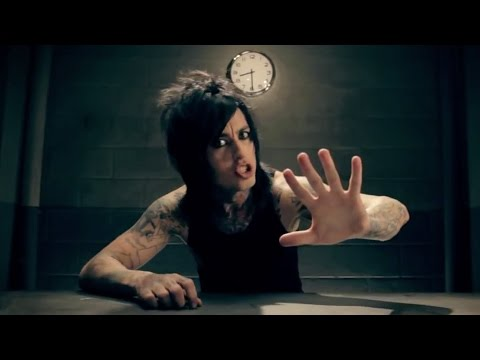

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("rgWr2nln83s")

In [2]:
class Onedimension:
    """ Una dimensión """
    def __init__(self,nx ,nt,dt,Lx):
        self.nx = nx
        self.nt = nt
        self.dt = dt
        self.Lx = Lx


class Funcion(Onedimension):
    def __init__(self,nx = 41 ,nt = 25,dt = 0.025,Lx = 2., c = 1):
        super().__init__(nx,nt,dt,Lx)
        self.c = c
        
        
    def wave_lineal(self,nx = 41 ,nt = 25,dt = 0.025,Lx = 2., c = 1):
        super().__init__(nx,nt,dt,Lx)
        self.c = c
        import matplotlib.pyplot as plt
        from drawnow import drawnow
        import numpy as np
        import time, sys  
        import copy 

  
        def makeFig():
            plt.plot(xList,yList,'b')
            plt.plot(1,Lx)
            plt.xlabel('X (m)')
            plt.ylabel('Y (m)')
            plt.title("ECUACION DE LA ONDA\n Lineal \n Tiempo {:.3f} s".format(inter))
            plt.grid(True)
            plt.annotate(s=u"Celeridad = {} m/s".format(self.c), xy=(0.95, 1.8), xytext=(0.2, 1.8), arrowprops=dict(arrowstyle = "->"))
            plt.savefig("Onda_lineal.png") #Grafico de la Onda en PNG
            plt.savefig("Onda_lineal.jpg") #Grafico de la Onda en JPG
            plt.savefig("Onda_lineal.pdf") #Grafico de la Onda en PDF
            plt.show()
            


        plt.ion() 
        fig=plt.figure() 

       
        dx = Lx/(nx -1)
        u = np.ones(nx)
        A = np.zeros((nt, nx))
        u[int(.5/dx) : int(1./dx + 1)] = 2 # Para valores dentro de un array siempre poner enteros
        # u0 = copy.copy(u)
        un = np.ones(nx)
        for n in range(nt):
            un[:] = u[:]
            for i in range(1,nx):
                u[i] = un[i] - c * (dt/dx)*(un[i]-un[i-1])
            A[n,:] = u
    
        for i in range(nt):
            xList = np.linspace(0,Lx,nx)
            yList = A[i,:]
            inter = i * dt
            drawnow(makeFig)
            plt.pause(0.01)
        drawnow(makeFig)
        plt.show('hold')

    def wave_no_lineal(self,nx = 41 ,nt = 25,dt = 0.025,Lx = 2.):
        super().__init__(nx,nt,dt,Lx)
        import matplotlib.pyplot as plt
        from drawnow import drawnow
        import numpy as np
        import time, sys  
        import copy 

  
        def makeFig():
            plt.plot(xList,yList)
            plt.plot(1,Lx)
            plt.xlabel('X (m)')
            plt.ylabel('Y (m)')
            plt.title("ECUACION DE LA ONDA\n No Lineal \n Tiempo{:.3f} s".format(inter))
            plt.grid(True)
            plt.annotate(s=u"Celeridad ", xy=(0.95, 1.8), xytext=(0.2, 1.8), arrowprops=dict(arrowstyle = "->"))
            #Guardo la grafica final en PNG,JPG y PDF
            plt.savefig("Onda_no_lineal.png") #Grafico de la Onda en PNG
            plt.savefig("Onda_no_lineal.jpg") #Grafico de la Onda en JPG
            plt.savefig("Onda_no_lineal.pdf") #Grafico de la Onda en PDF
            plt.show()


        plt.ion() 
        fig=plt.figure() 

       
        dx = Lx/(nx -1)
        u = np.ones(nx)
        A = np.zeros((nt, nx))
        u[int(.5/dx) : int(1./dx + 1)] = 2 # Para valores dentro de un array siempre poner enteros
        un = np.ones(nx)
        for n in range(nt):
            un[:] = u[:]
            for i in range(1,nx):
                u[i] = un[i] - un[i] * (dt/dx)*(un[i]-un[i-1])
            A[n,:] = u
    
        for i in range(nt):
            xList = np.linspace(0,Lx,nx)
            yList = A[i,:]
            inter = i*dt
            drawnow(makeFig)
            plt.pause(0.1)
        drawnow(makeFig)
        plt.show('hold')


## Observación

* En las siguientes líneas cuando se ejecuta el código, salen muchas gráficas, 
pero tendría que salir una sobre otra como un video  esto se logra gracias a **drawnow** para eso podemos
usar **Sublime Text** o con el **cmd**  ejecutando el script, en este notebook no se puede lograr eso.


* Aún no corrijo el código para que solucione ese pequeño problema. Los valores ingresados deben ser: 


    - Funcion().wave_lineal((Entero),(Entero),(Real),(Entero),(Real))
    - Funcion().wave_no_lineal((Entero),(Entero),(Real),(Entero))
    




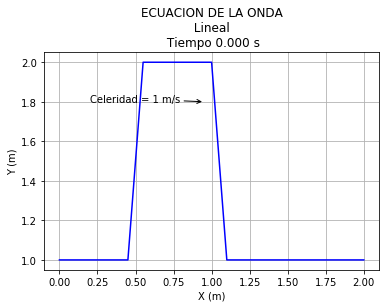

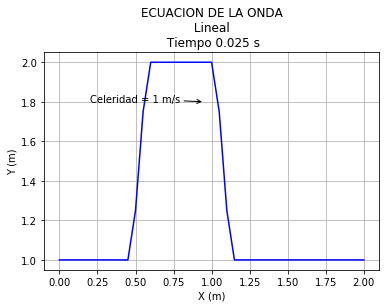

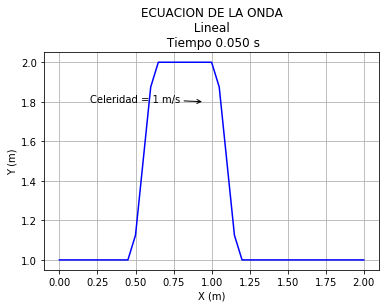

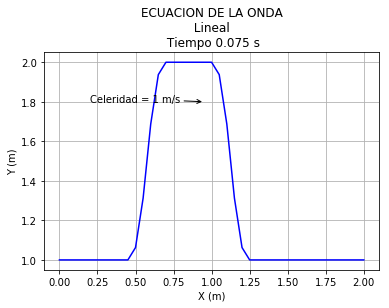

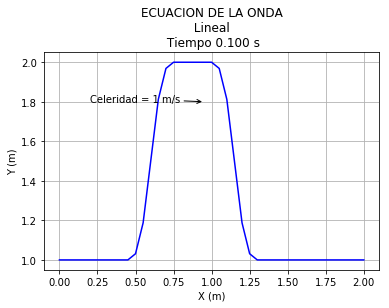

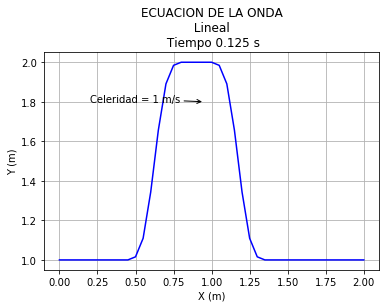

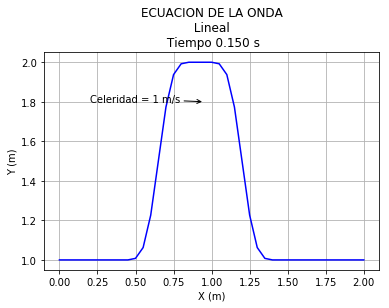

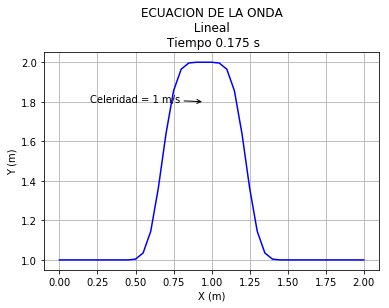

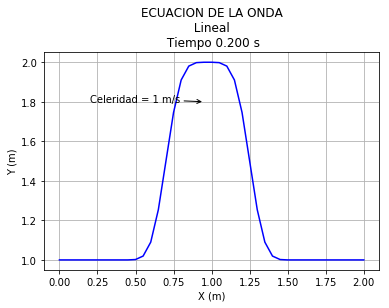

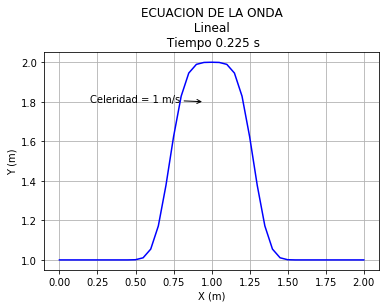

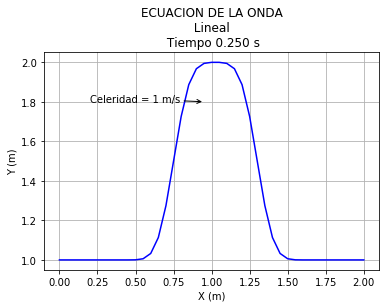

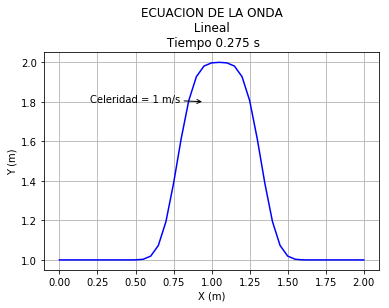

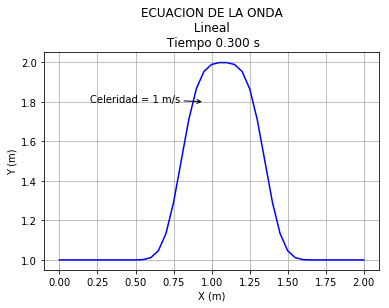

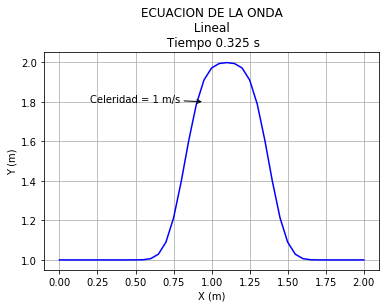

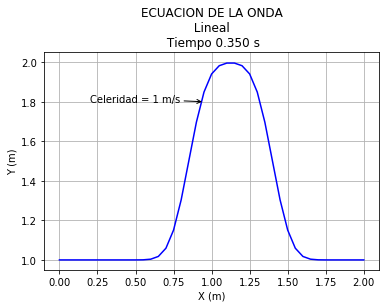

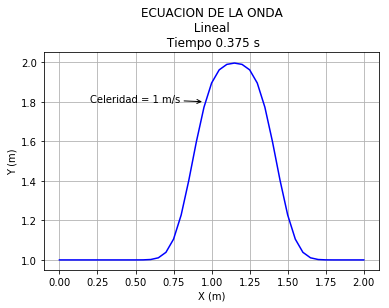

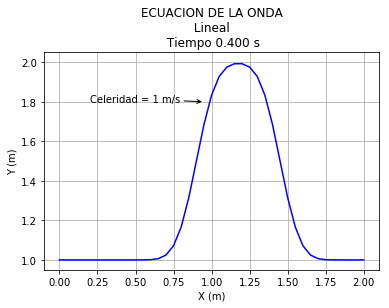

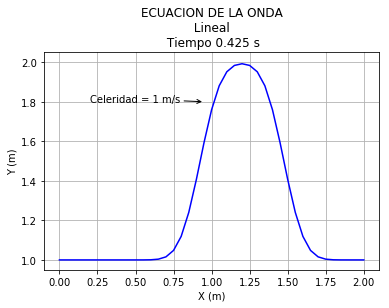

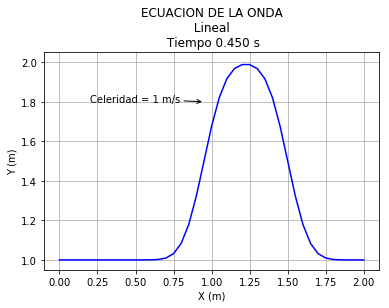

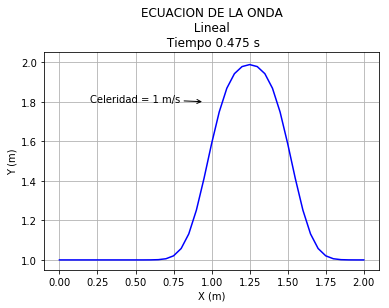

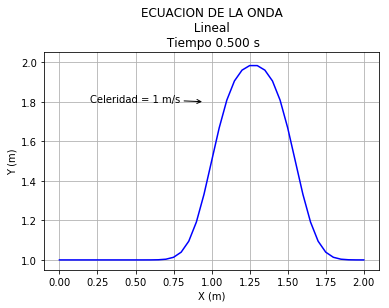

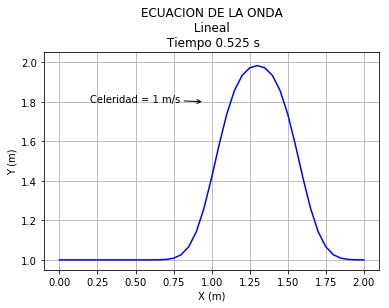

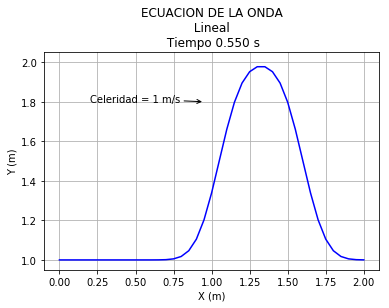

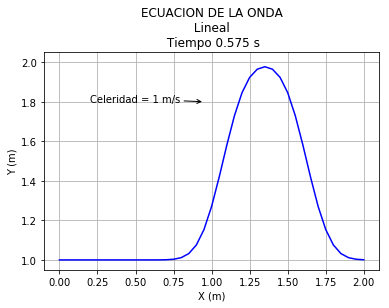

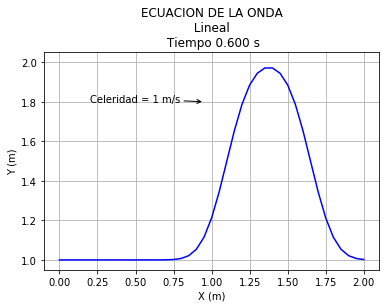

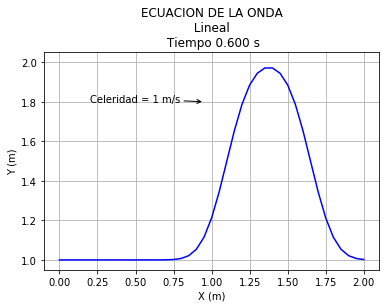

In [3]:
b = Funcion().wave_lineal() # Para valores por defecto 

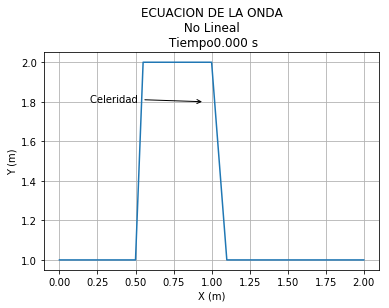

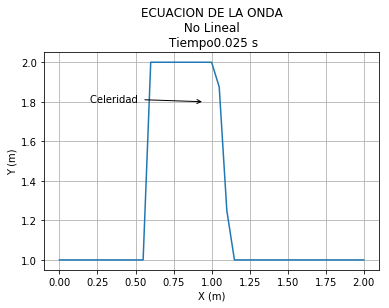

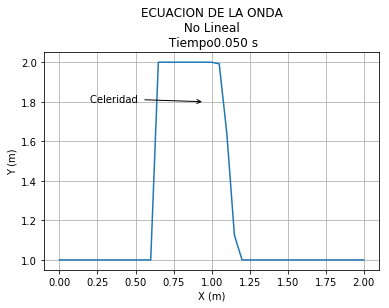

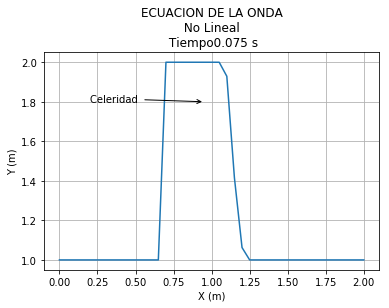

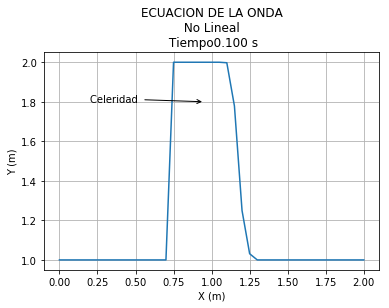

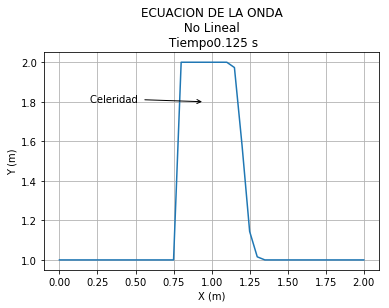

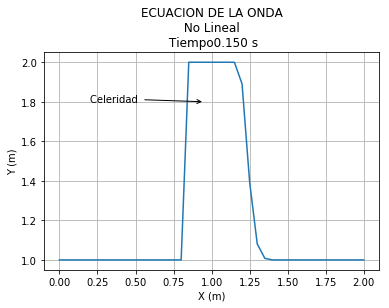

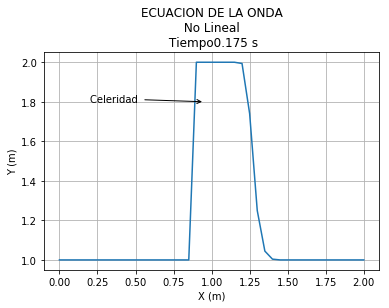

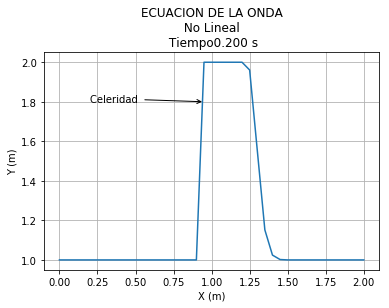

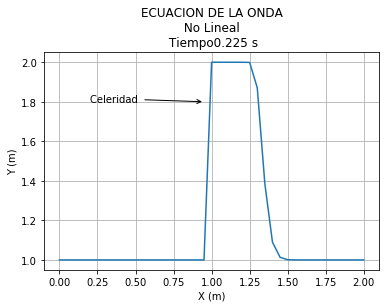

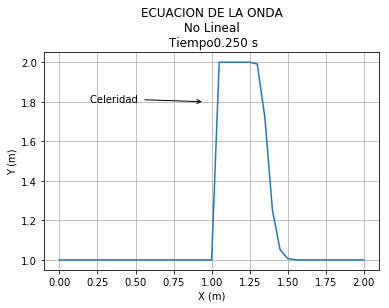

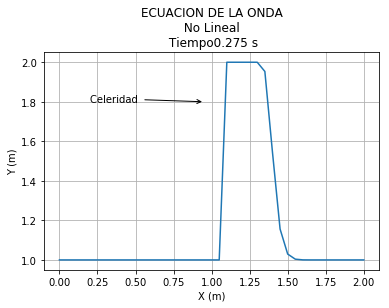

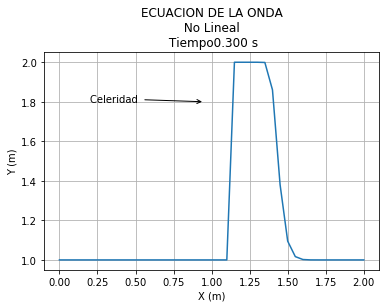

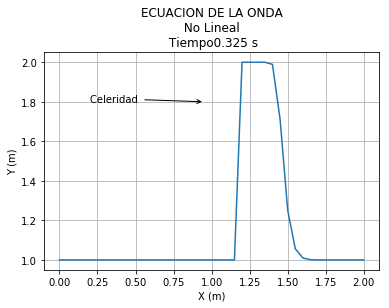

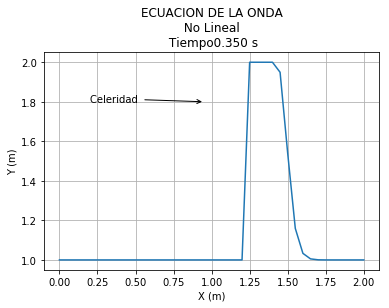

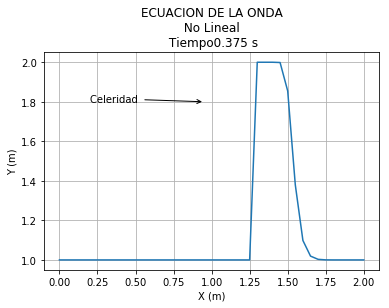

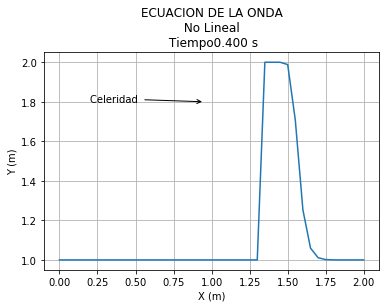

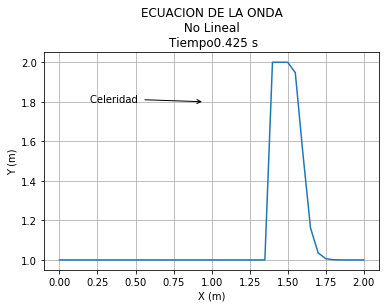

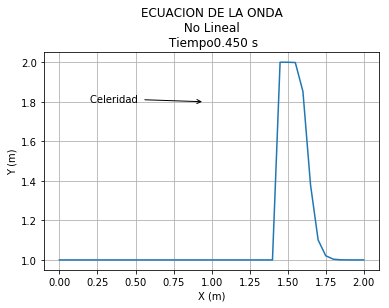

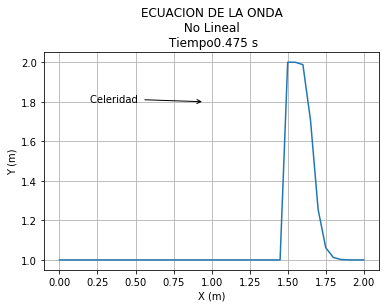

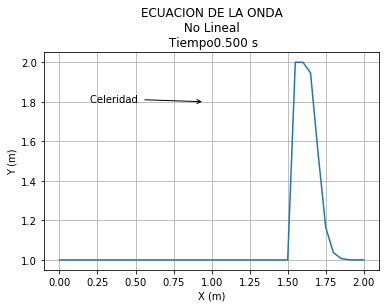

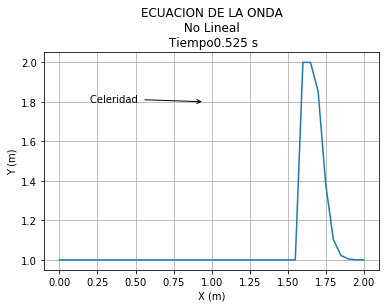

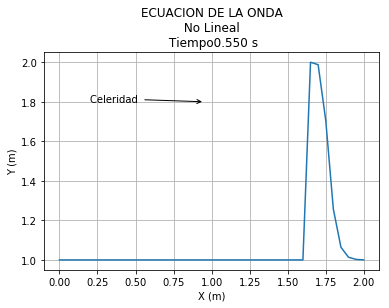

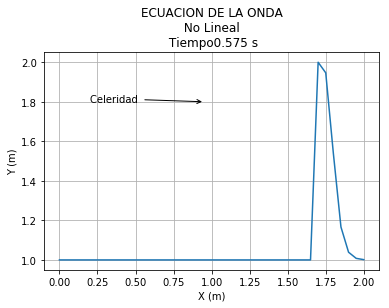

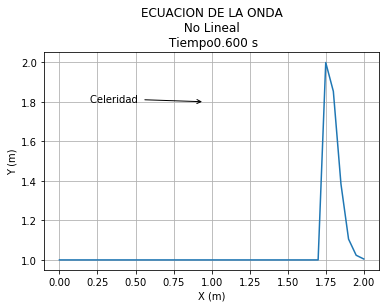

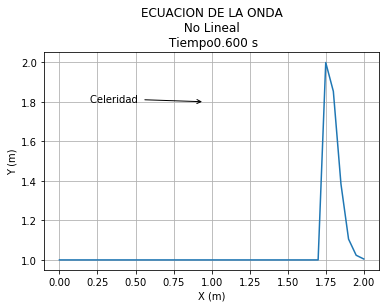

In [4]:
# Onda Convección no lineal 
b = Funcion().wave_no_lineal()


Ahora si experimentando: 

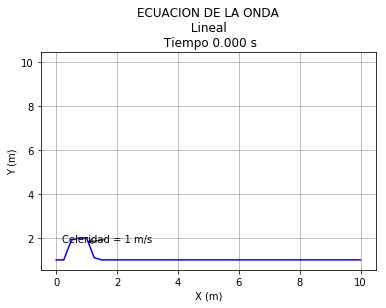

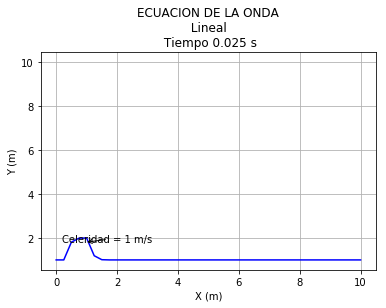

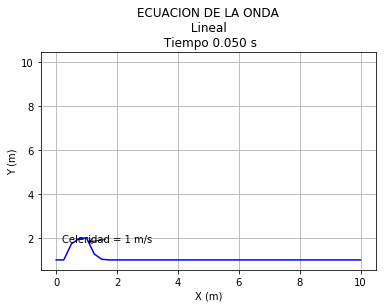

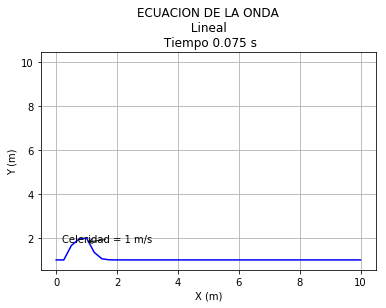

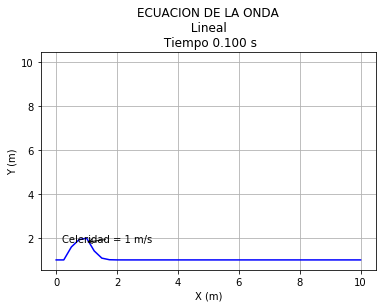

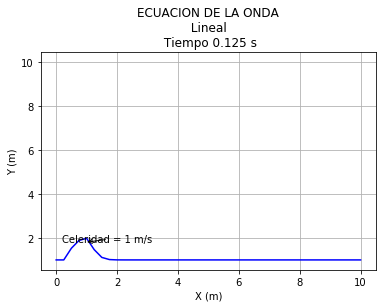

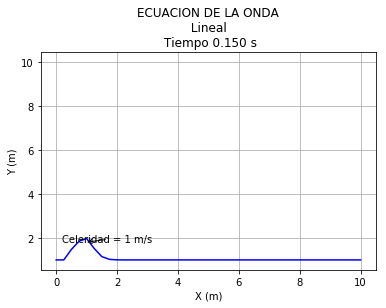

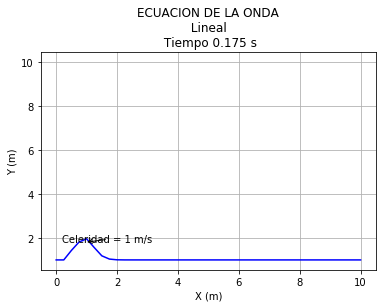

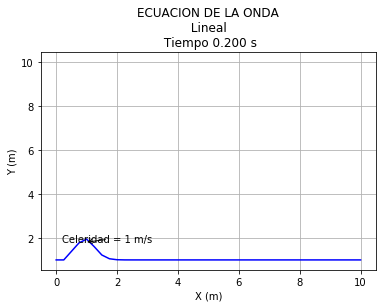

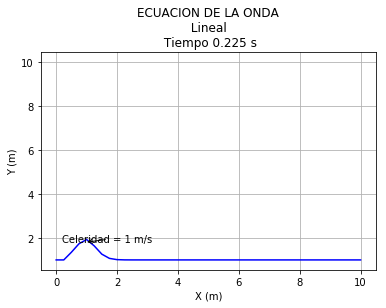

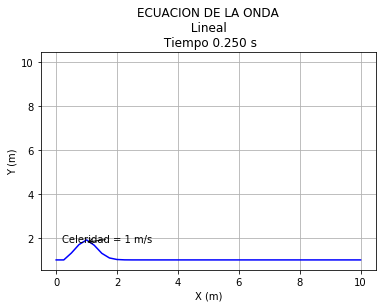

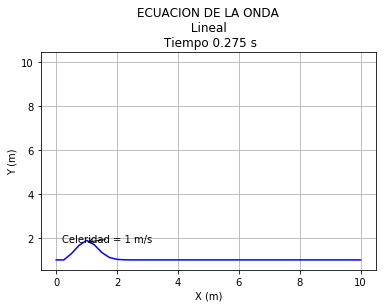

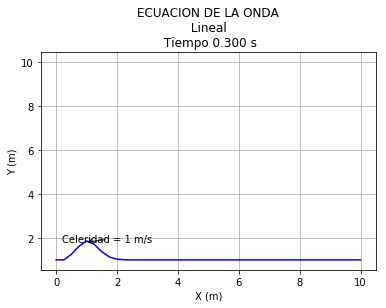

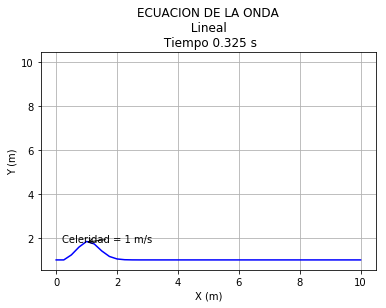

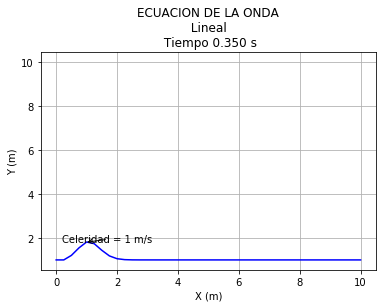

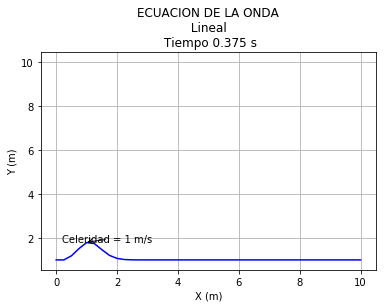

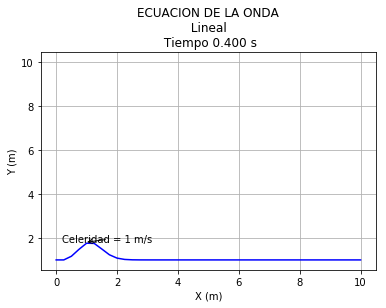

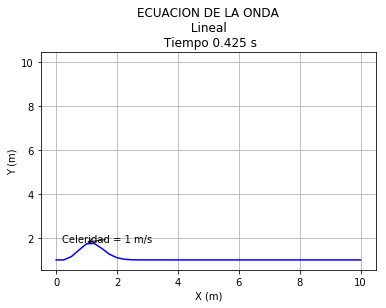

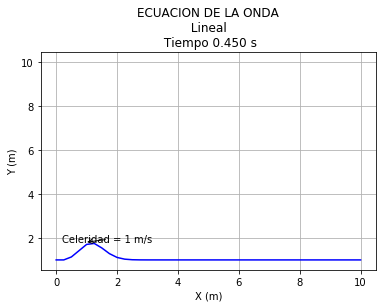

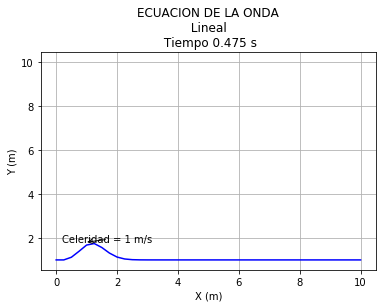

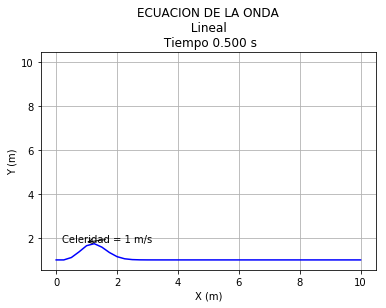

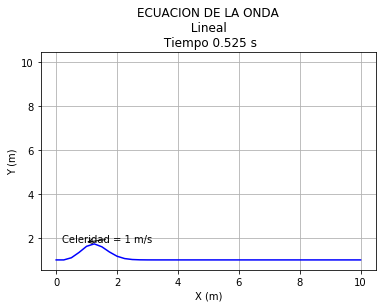

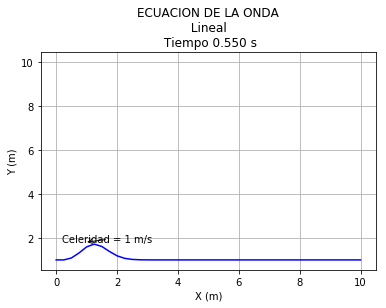

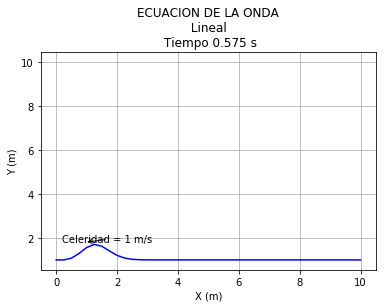

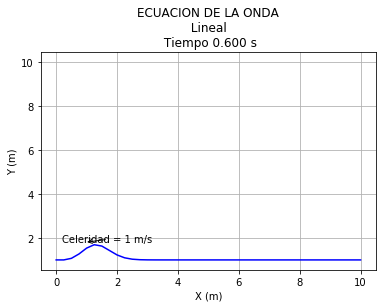

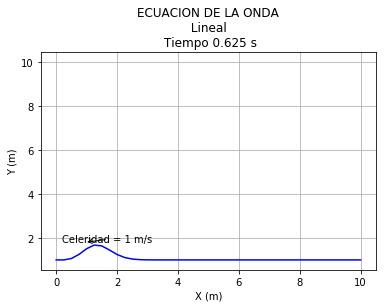

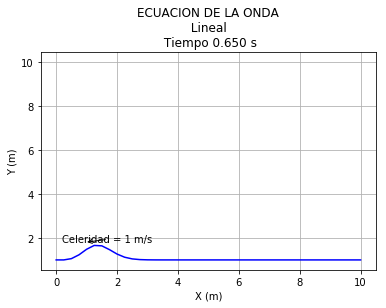

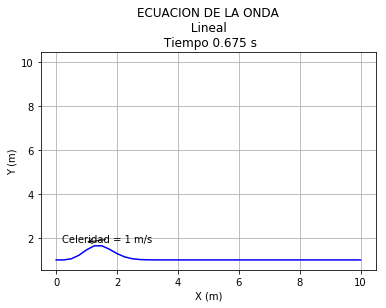

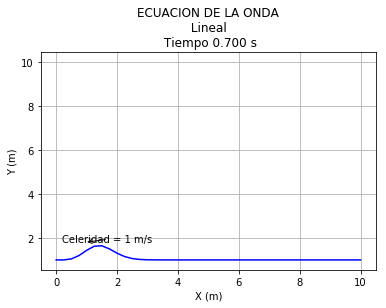

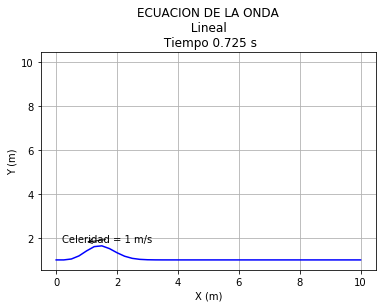

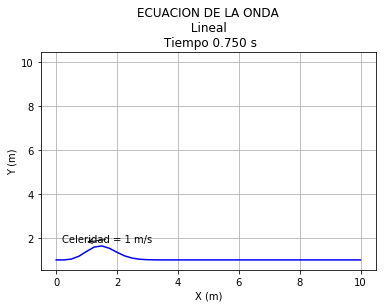

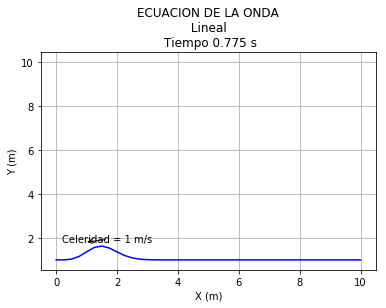

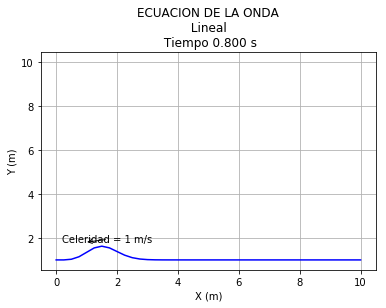

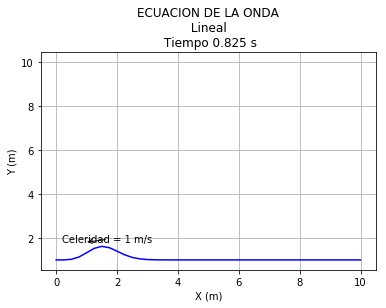

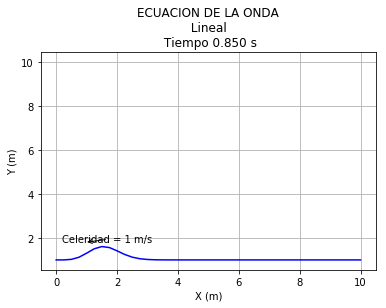

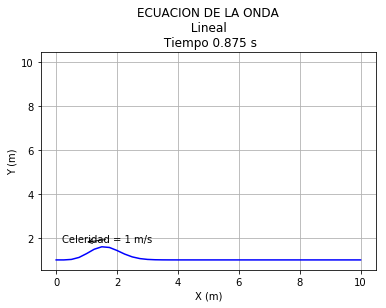

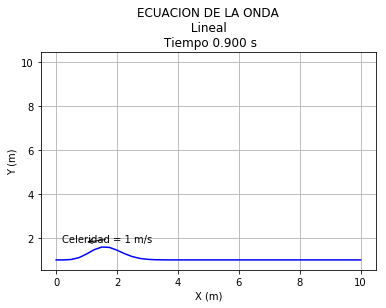

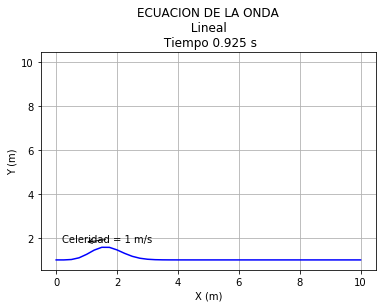

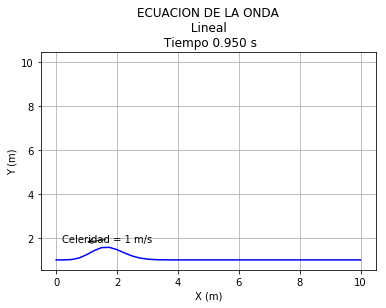

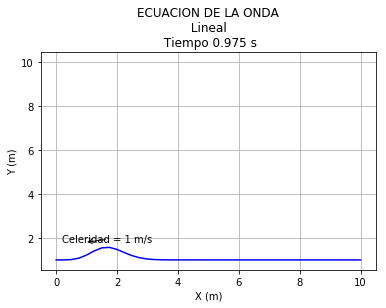

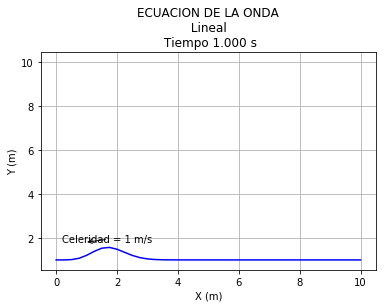

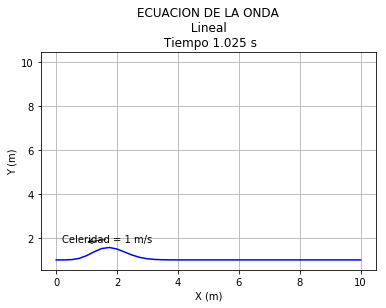

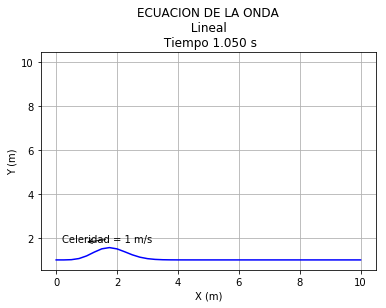

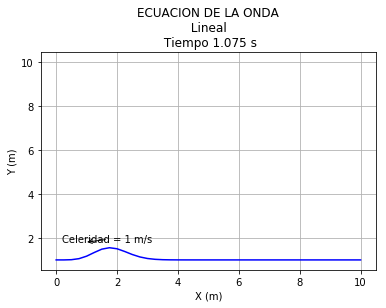

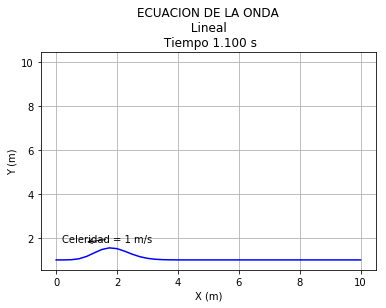

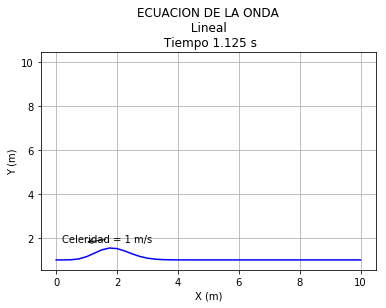

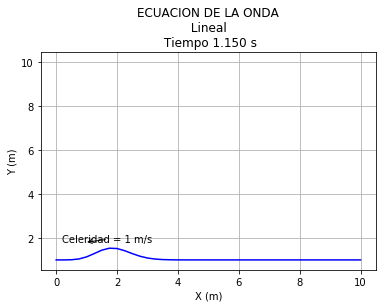

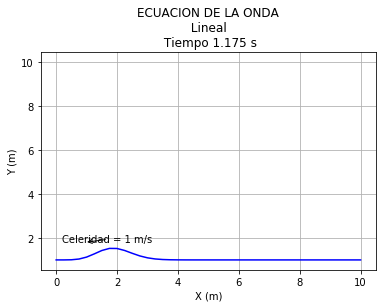

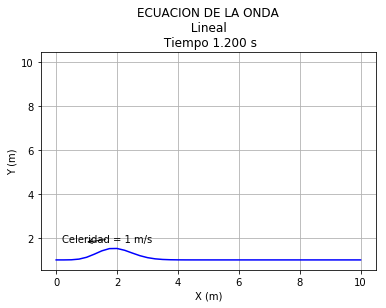

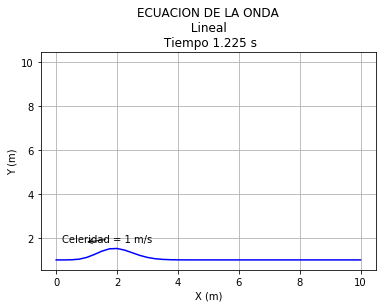

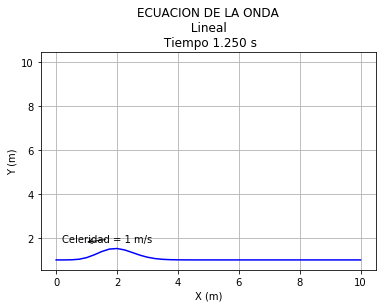

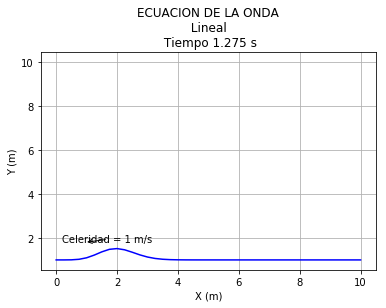

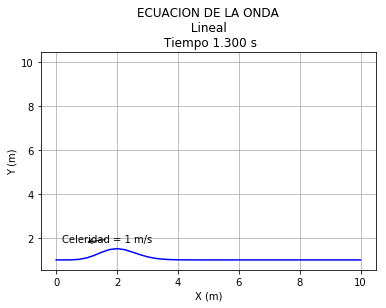

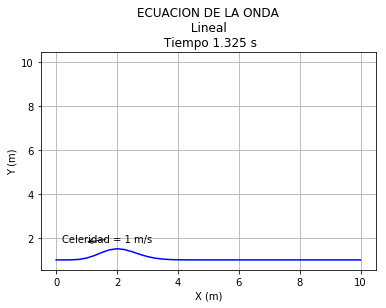

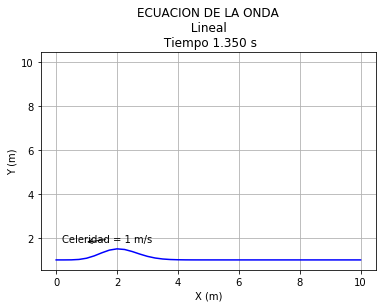

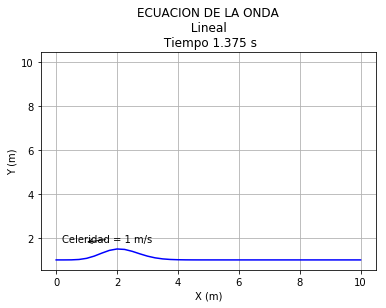

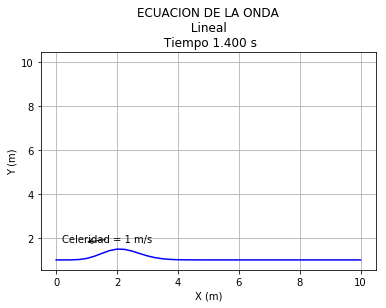

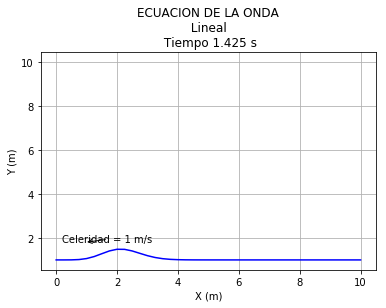

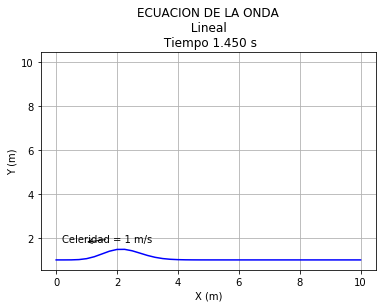

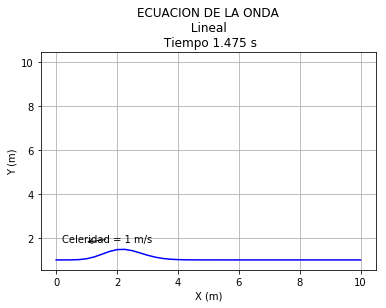

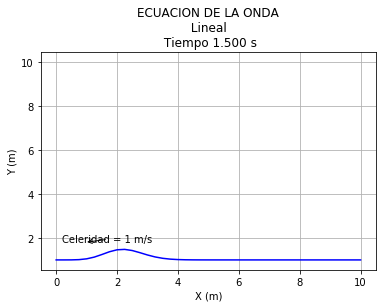

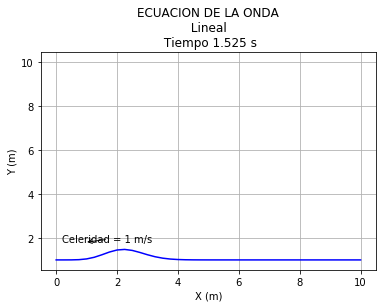

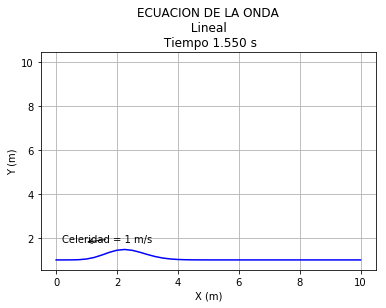

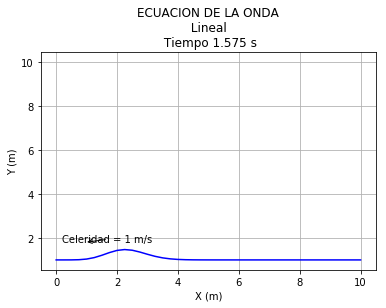

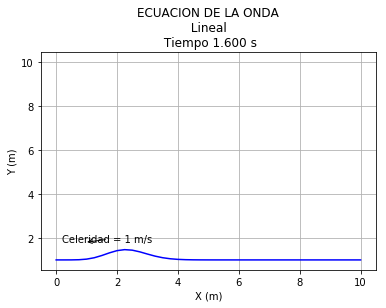

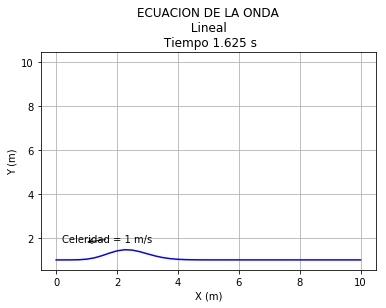

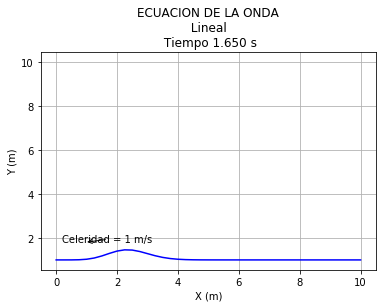

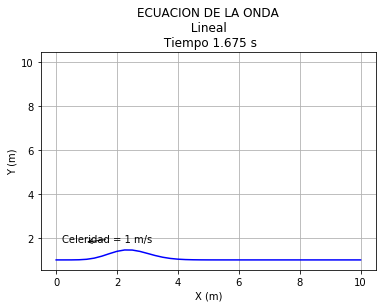

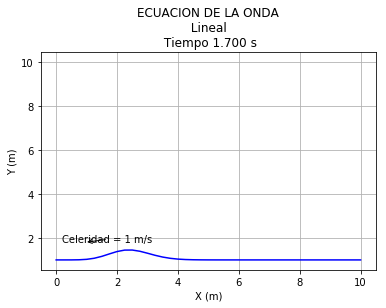

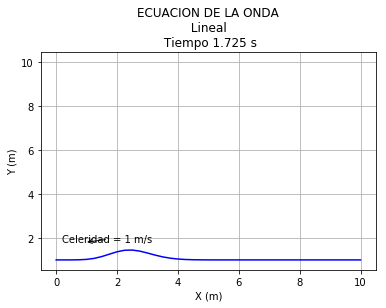

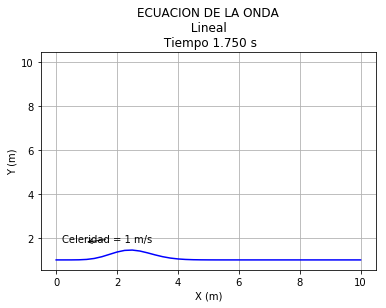

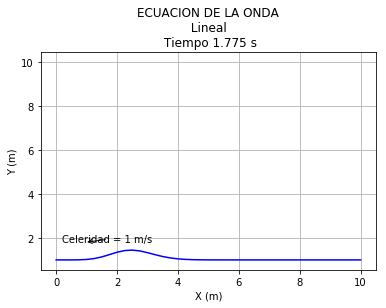

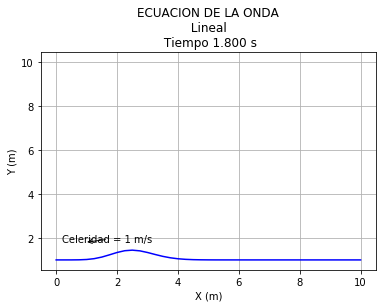

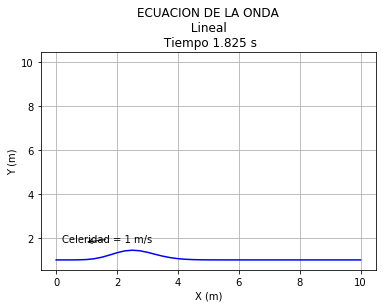

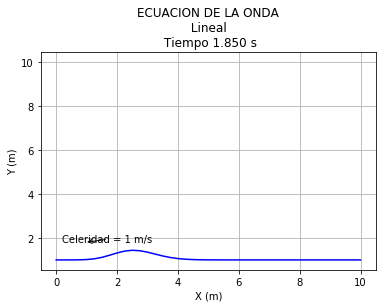

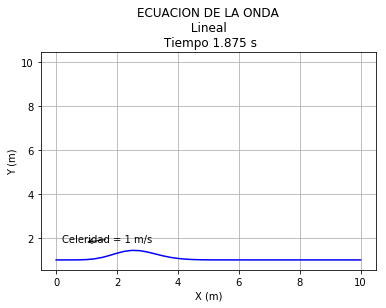

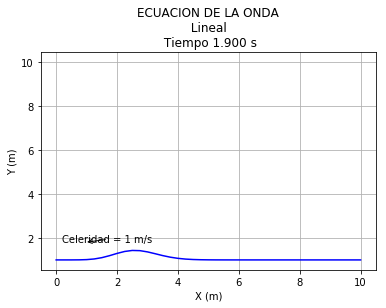

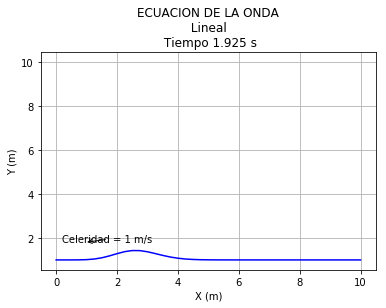

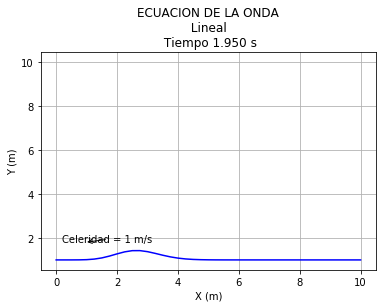

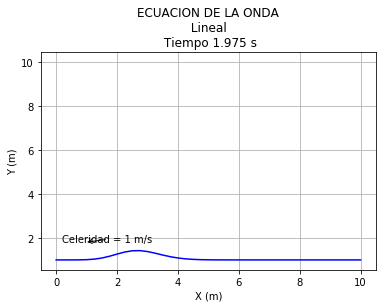

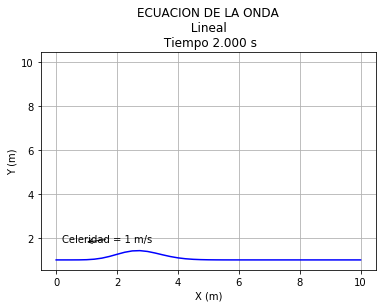

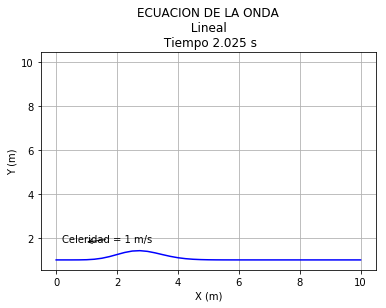

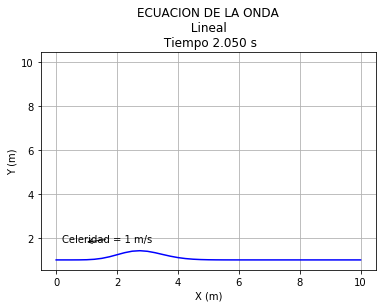

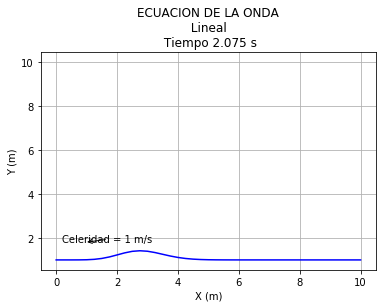

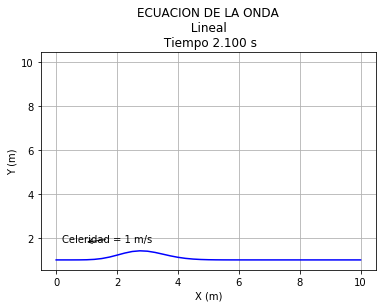

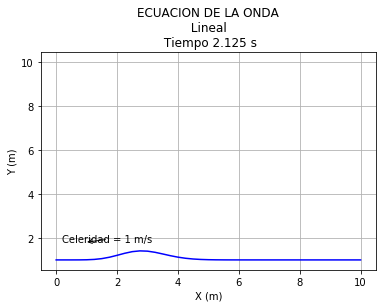

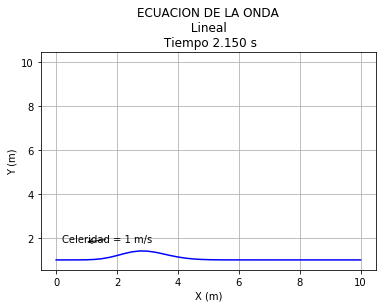

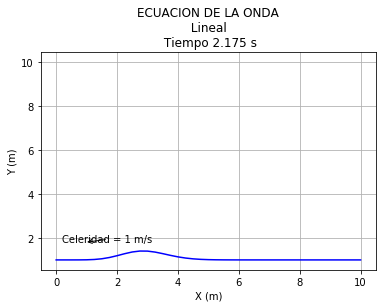

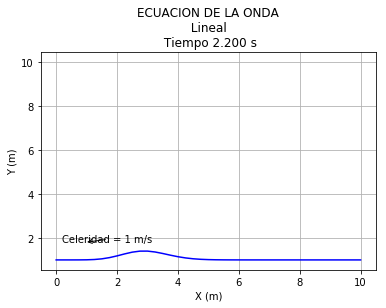

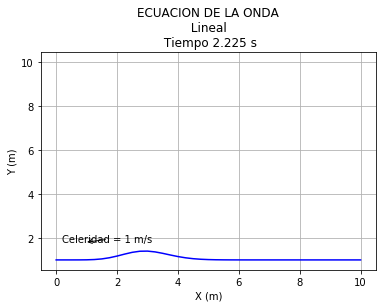

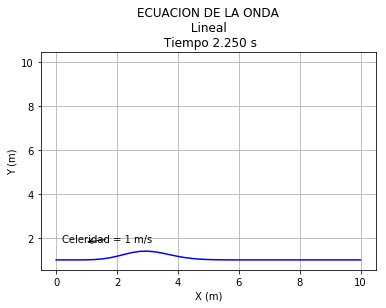

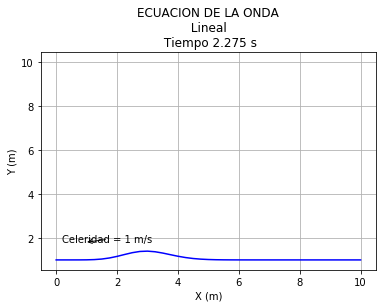

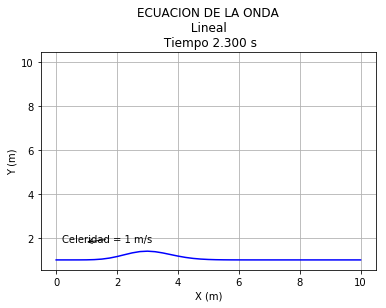

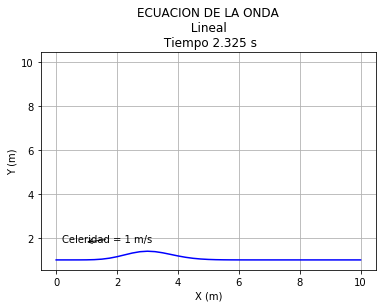

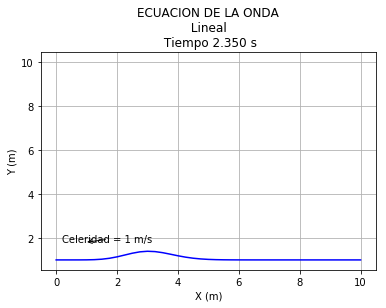

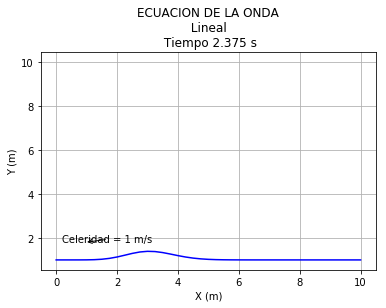

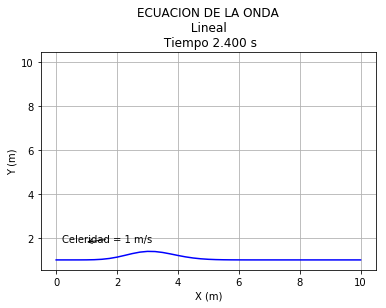

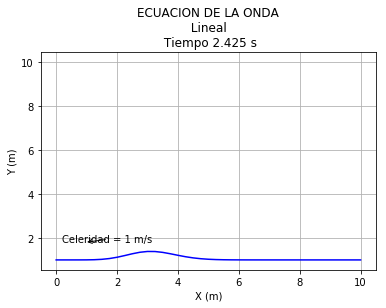

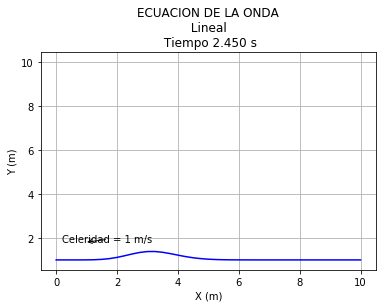

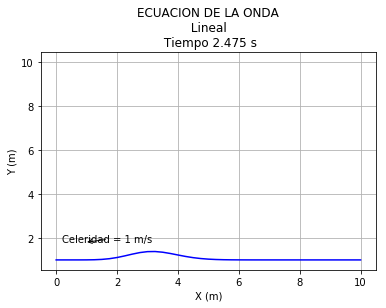

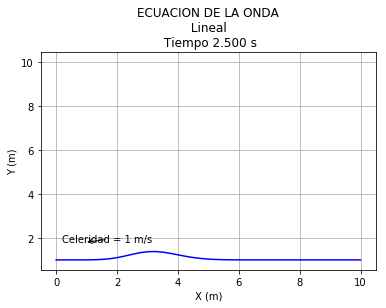

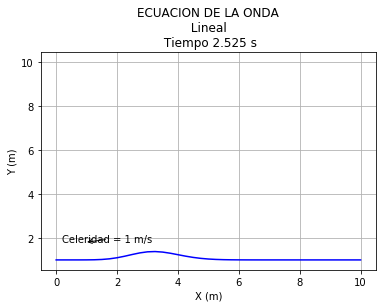

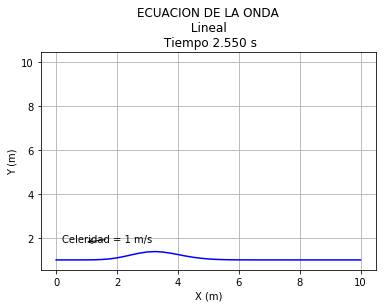

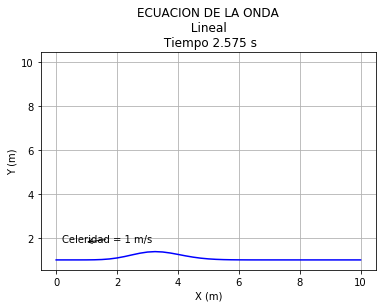

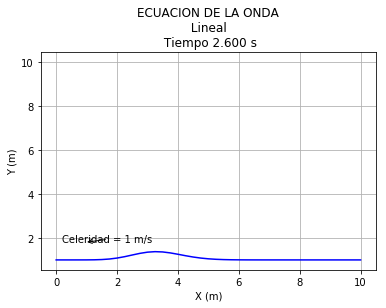

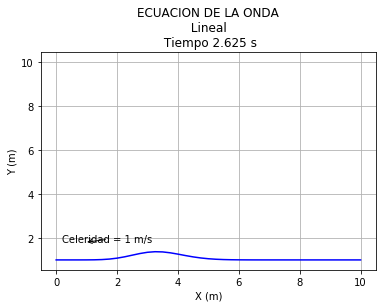

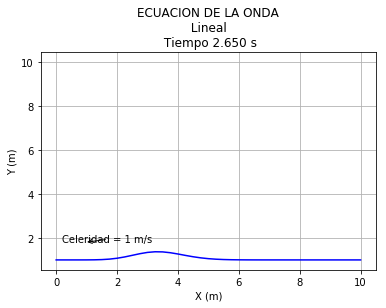

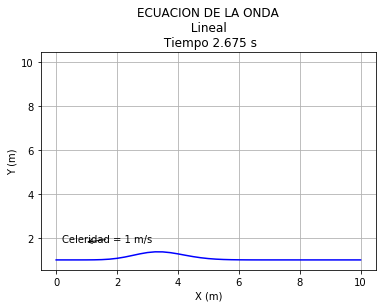

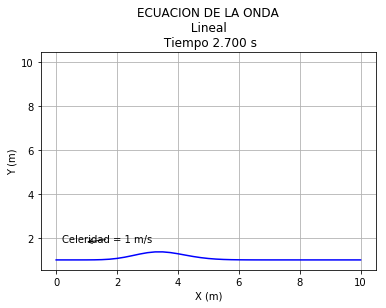

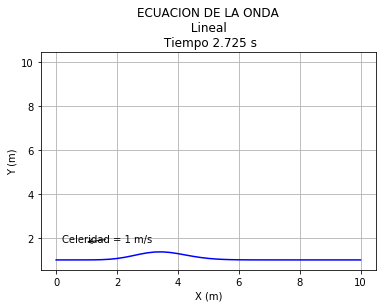

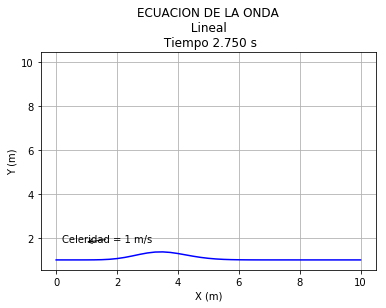

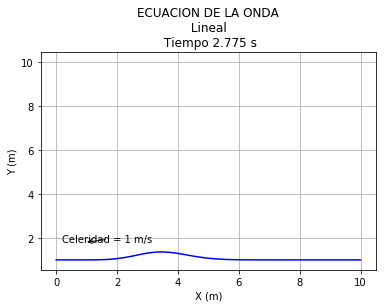

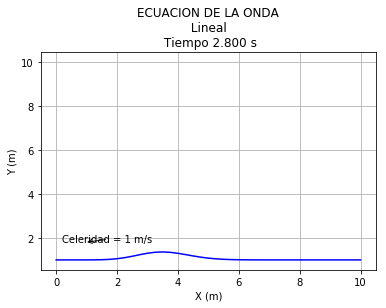

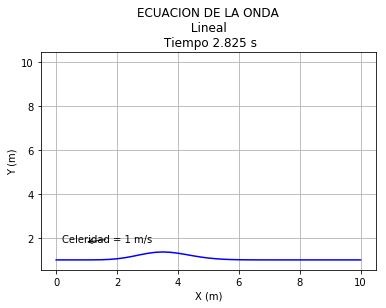

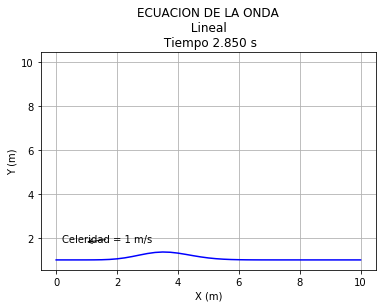

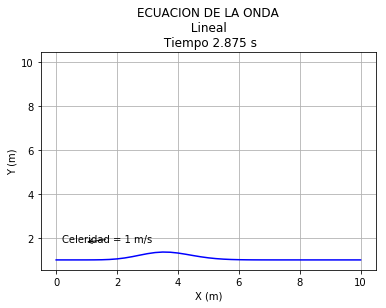

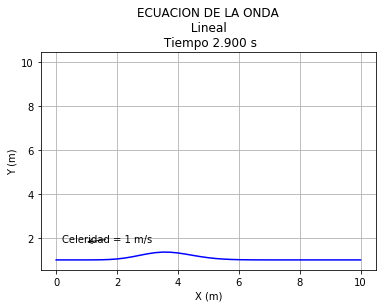

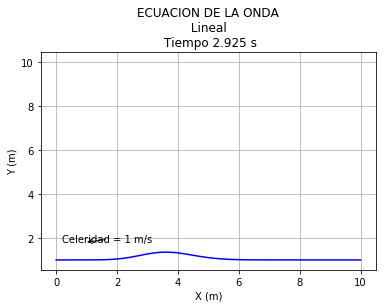

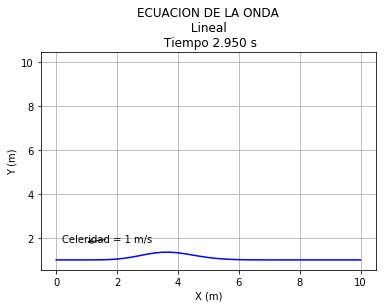

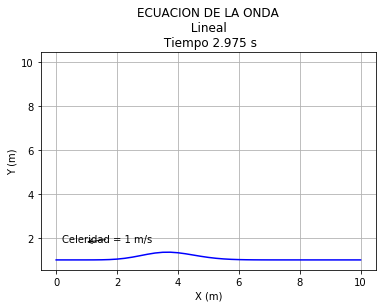

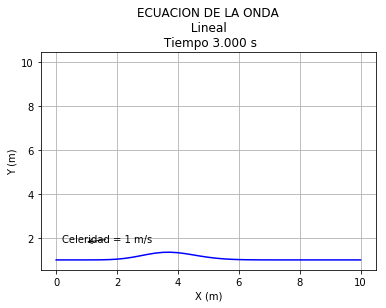

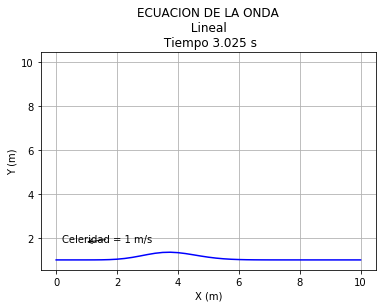

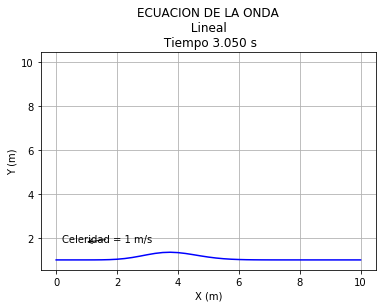

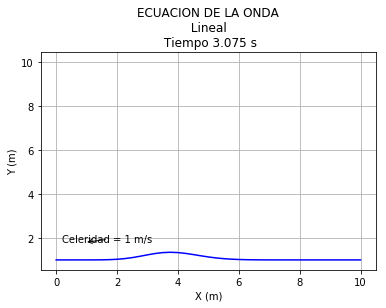

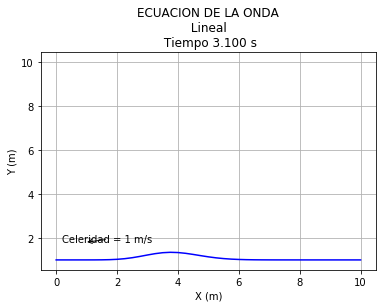

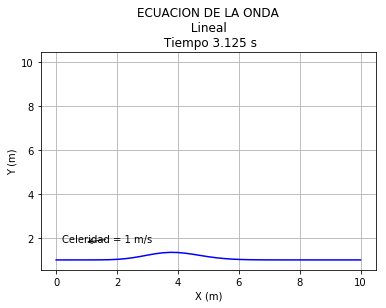

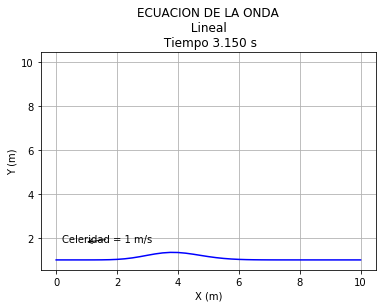

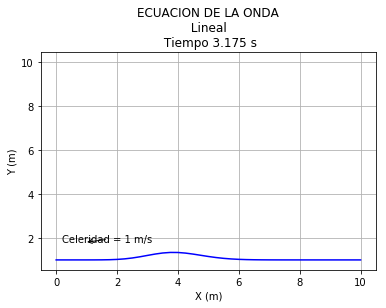

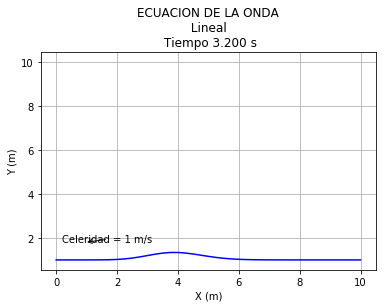

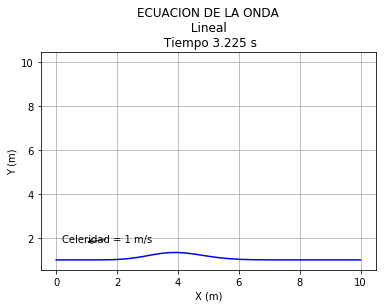

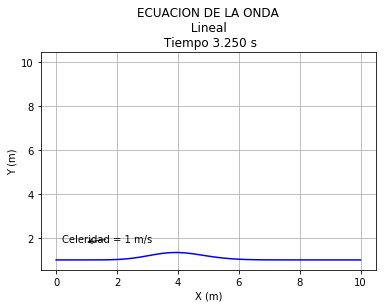

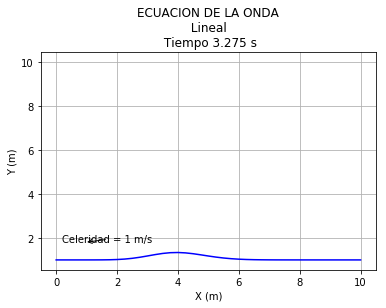

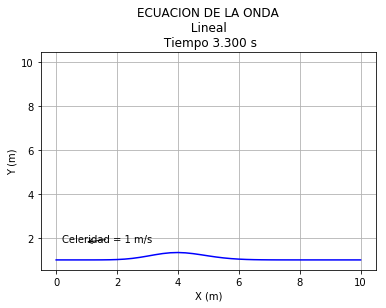

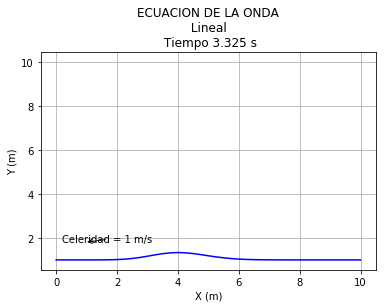

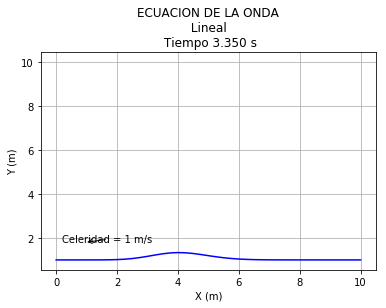

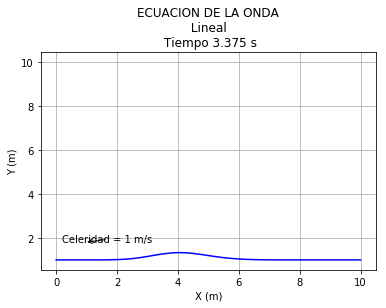

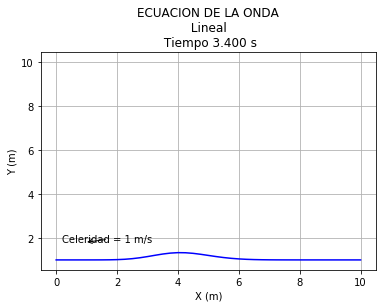

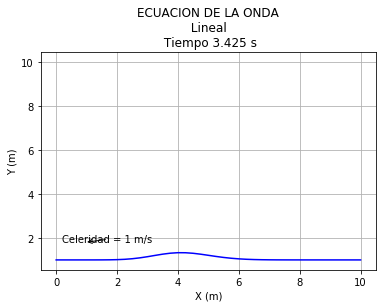

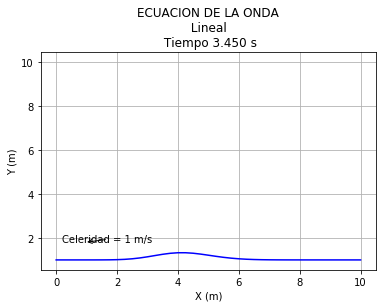

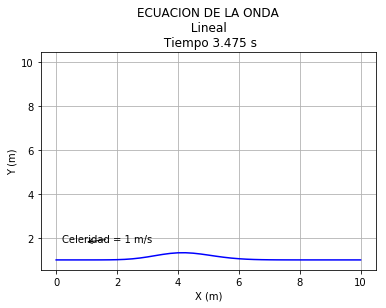

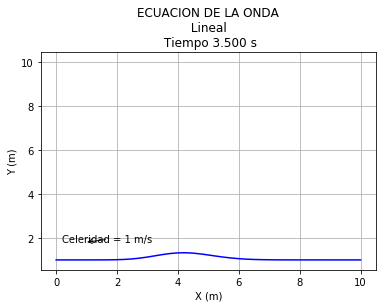

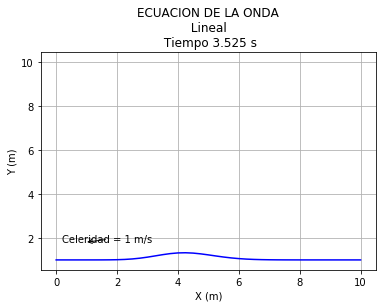

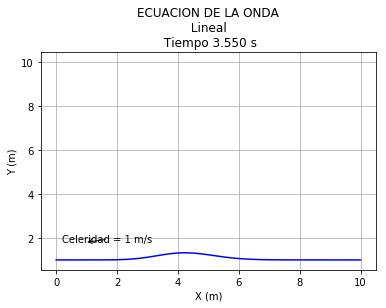

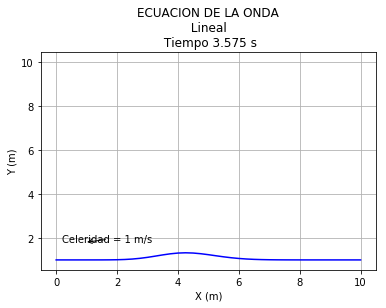

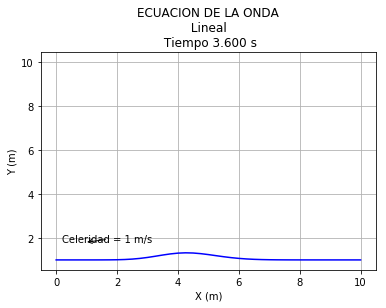

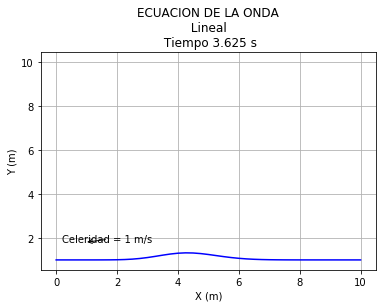

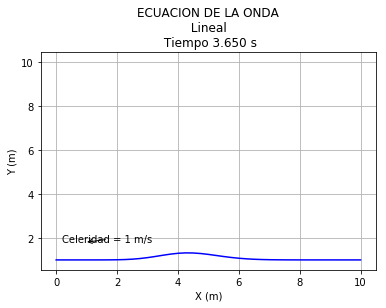

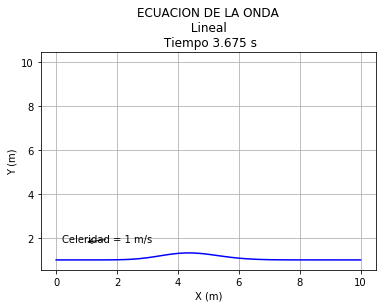

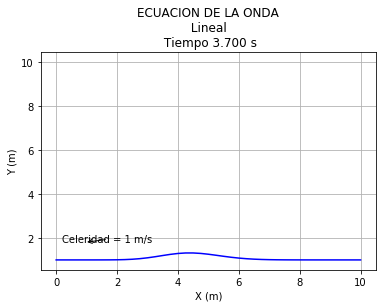

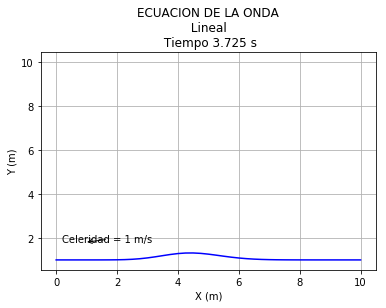

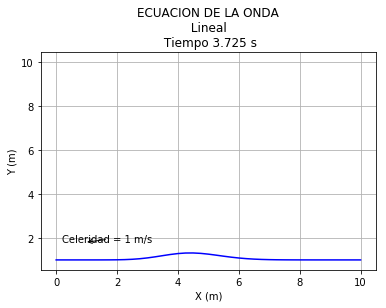

In [5]:
m = Funcion().wave_lineal(41,150,0.025,10,1)

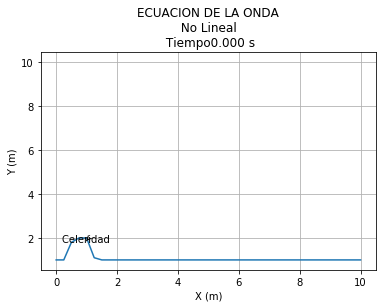

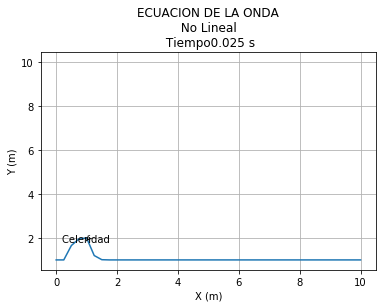

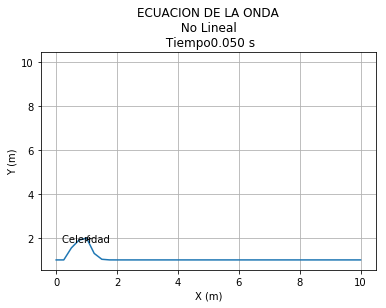

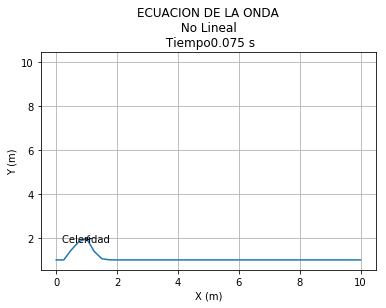

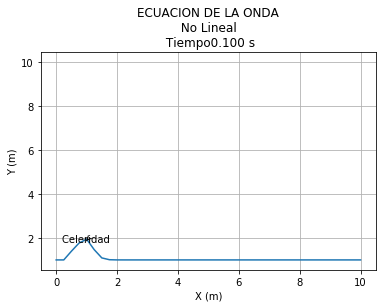

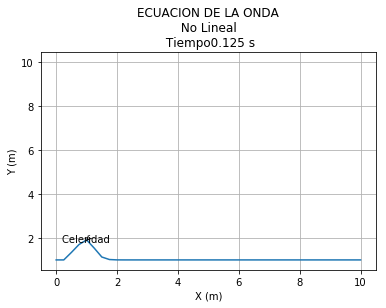

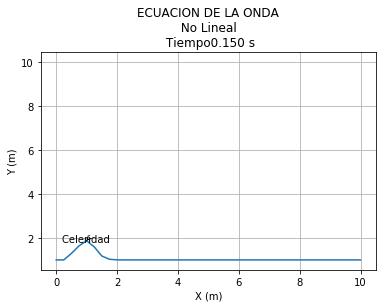

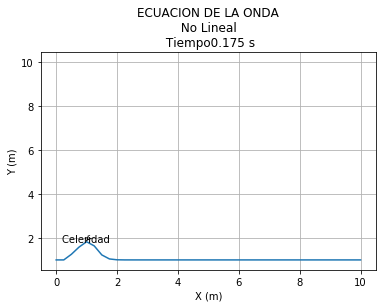

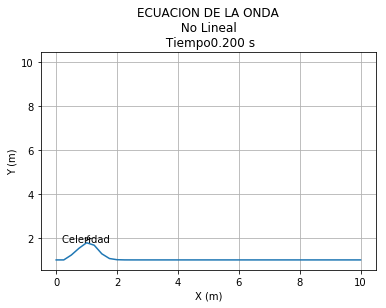

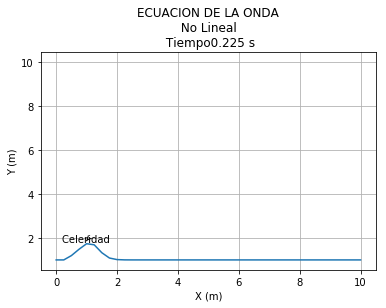

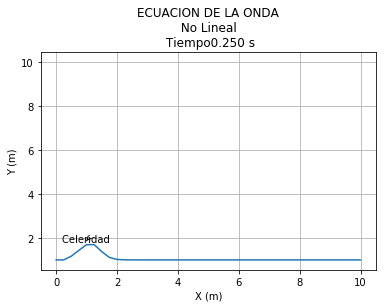

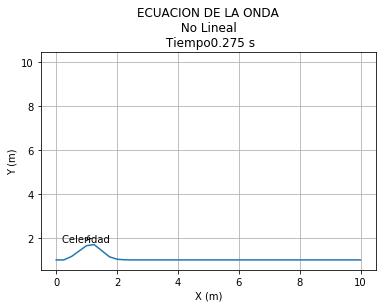

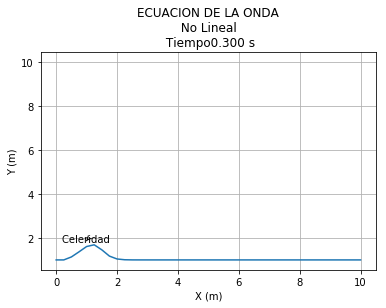

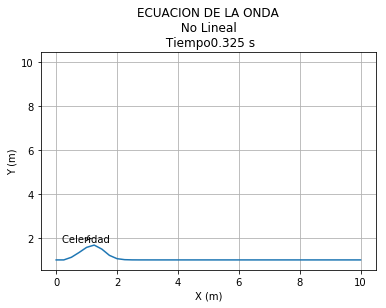

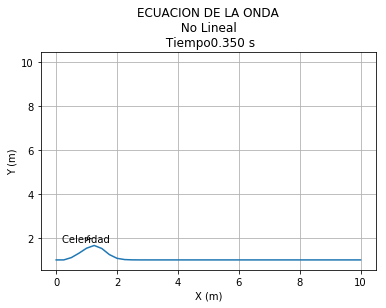

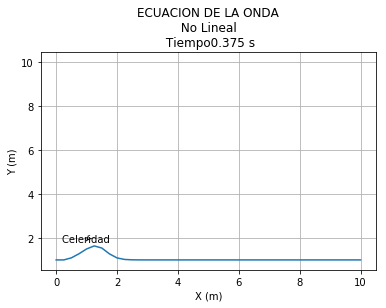

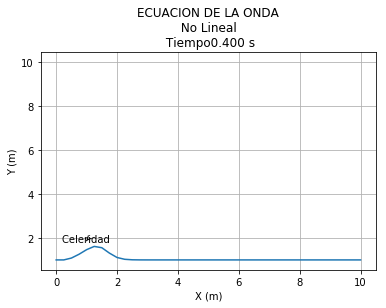

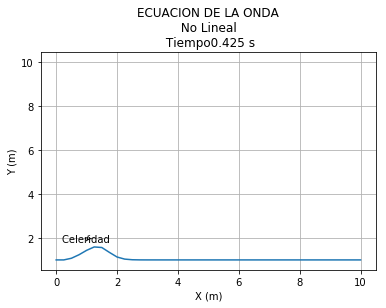

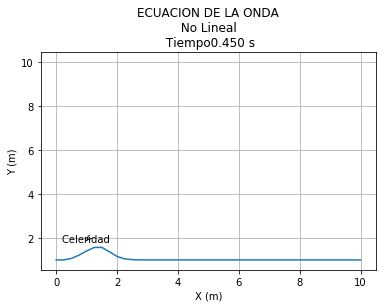

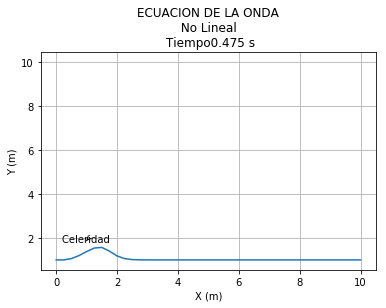

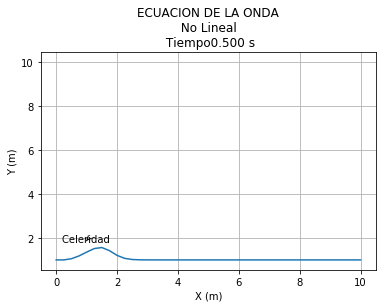

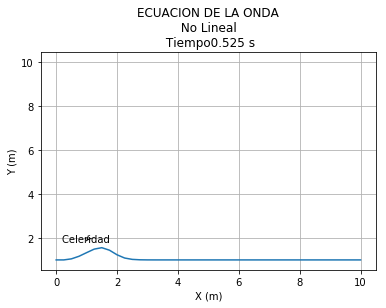

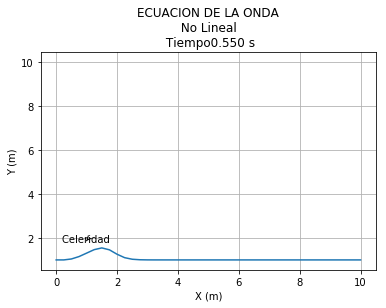

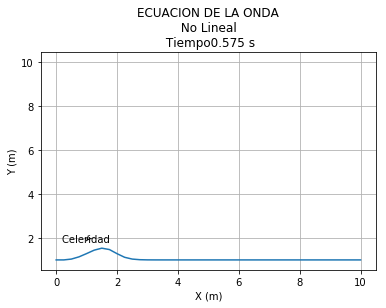

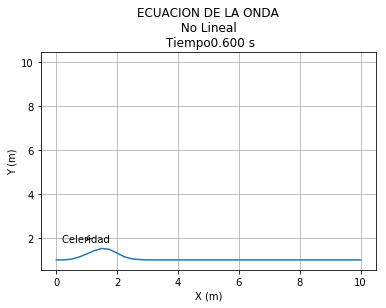

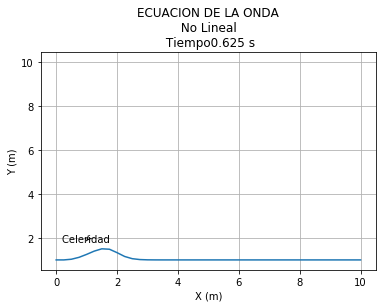

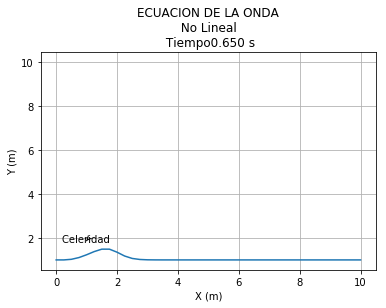

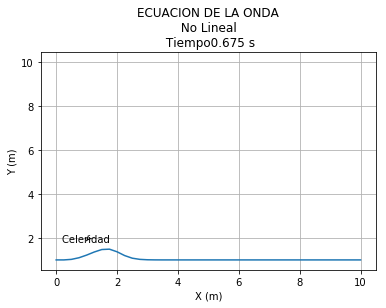

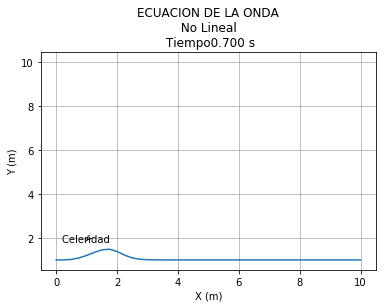

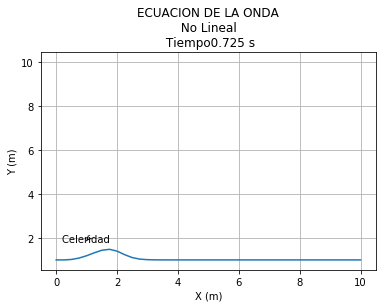

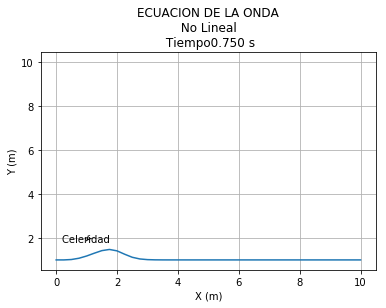

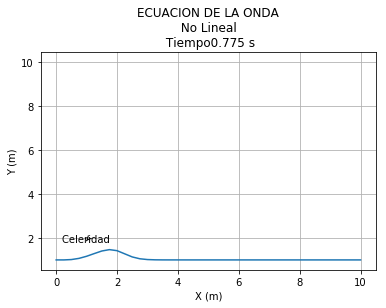

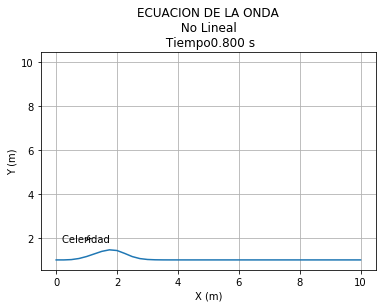

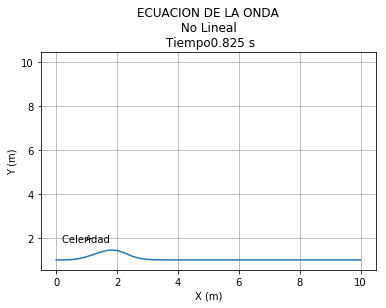

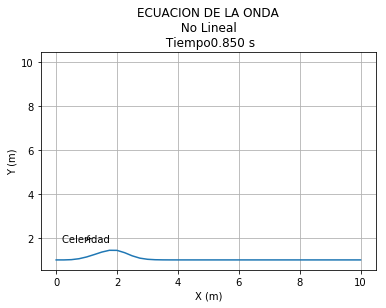

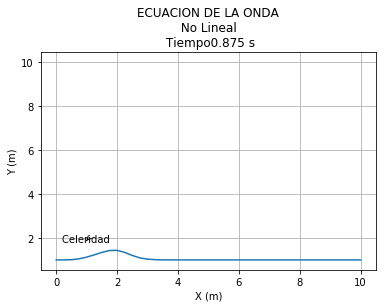

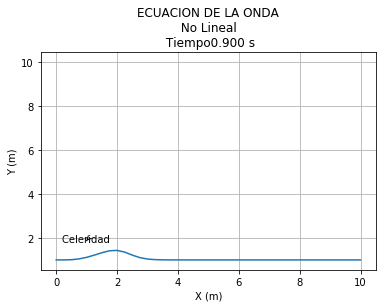

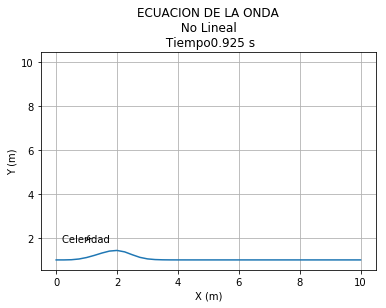

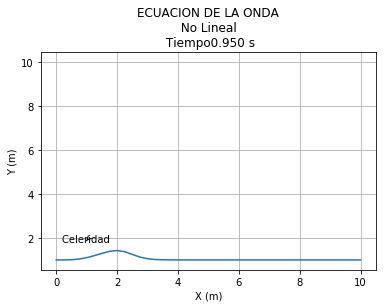

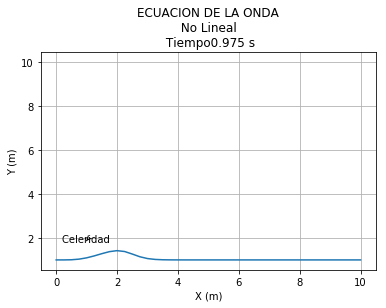

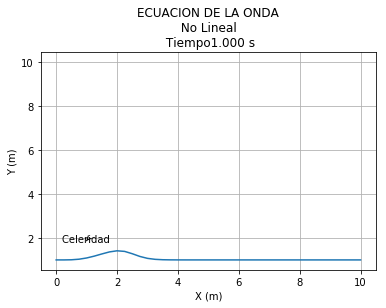

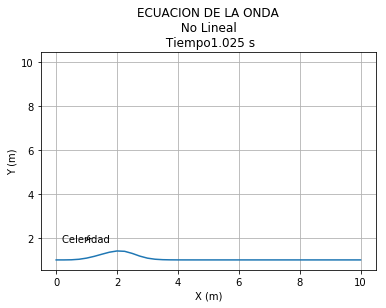

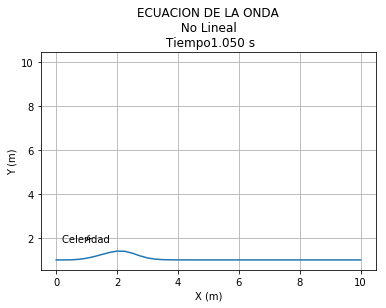

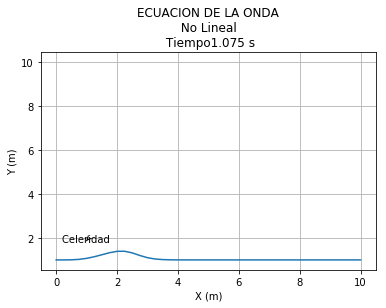

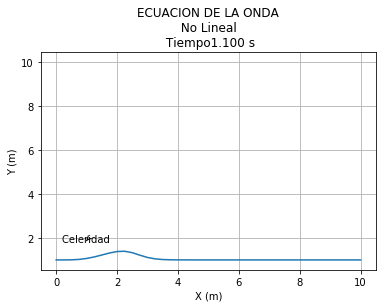

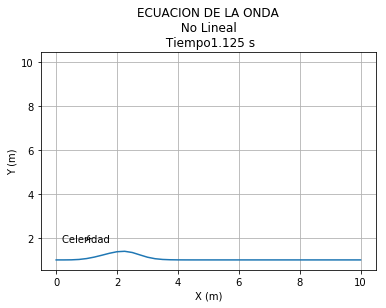

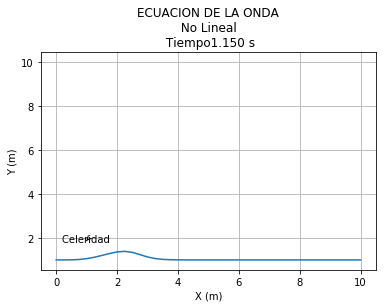

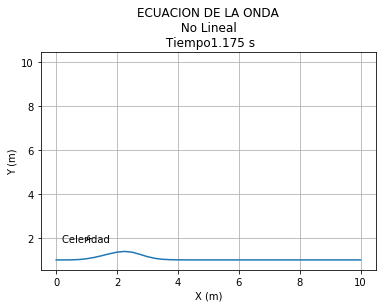

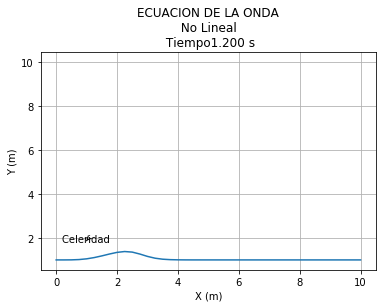

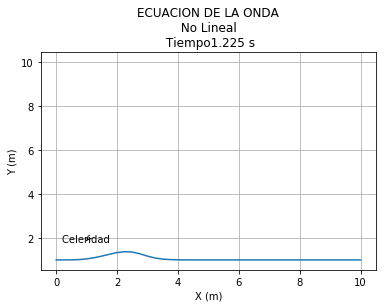

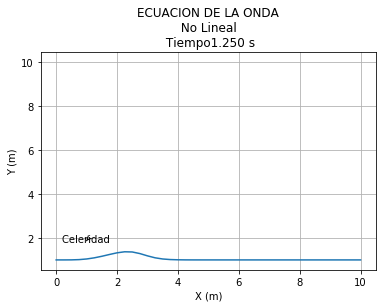

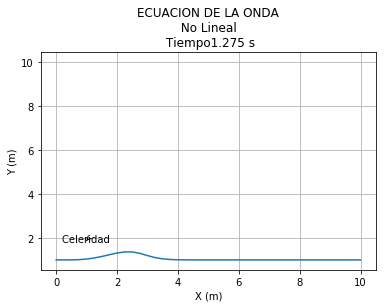

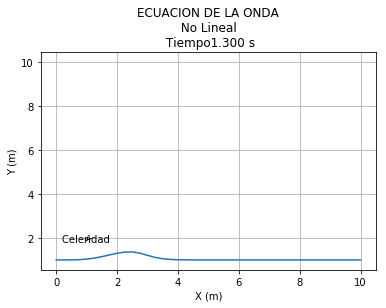

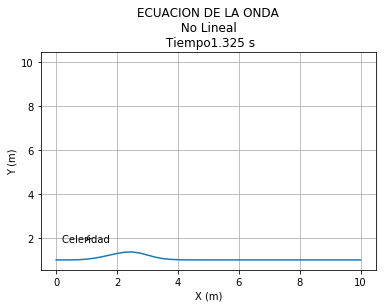

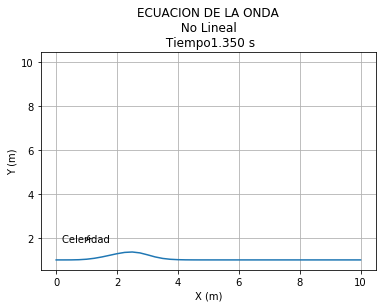

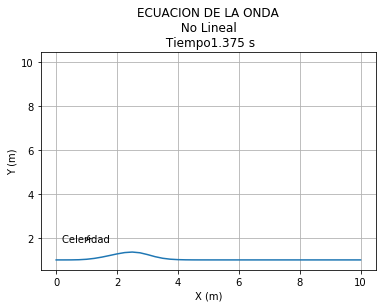

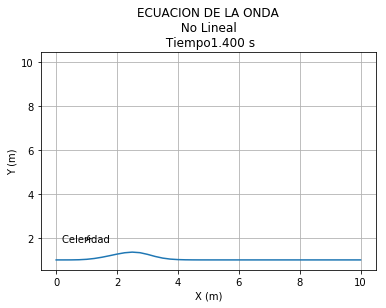

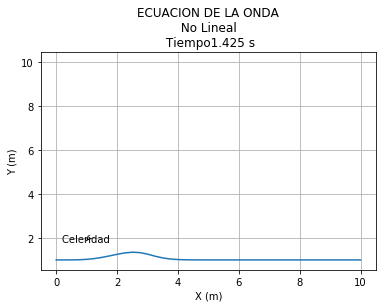

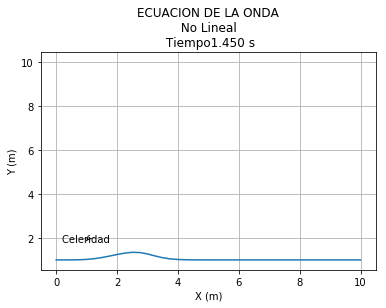

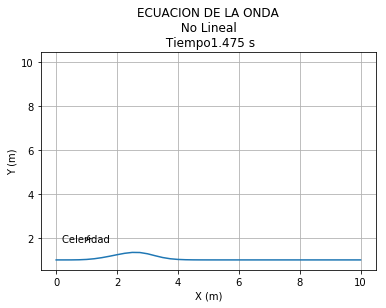

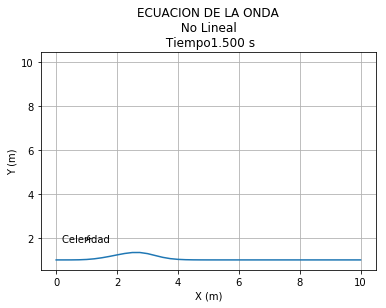

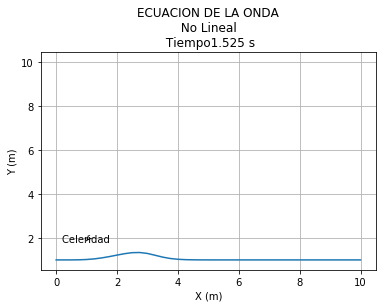

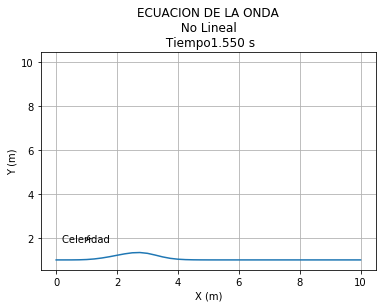

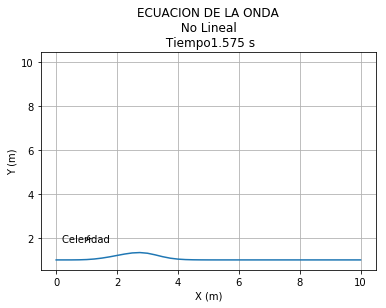

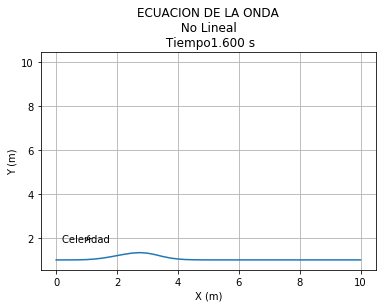

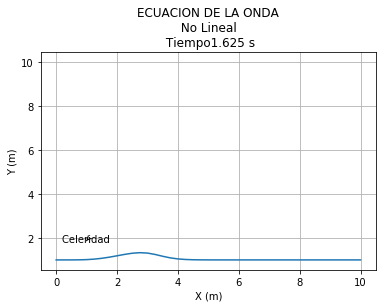

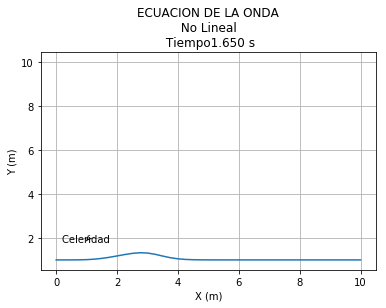

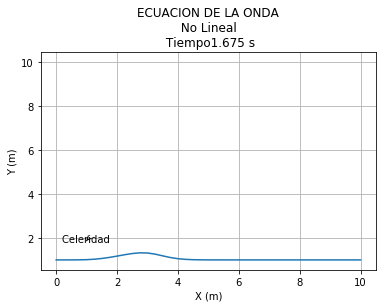

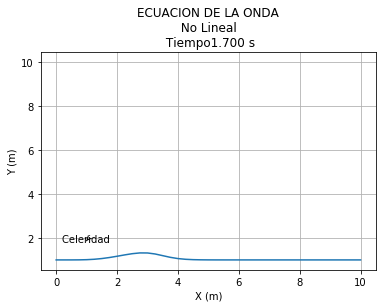

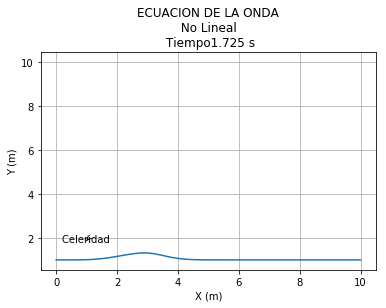

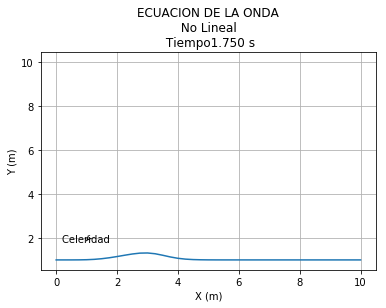

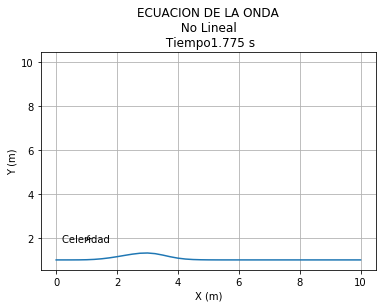

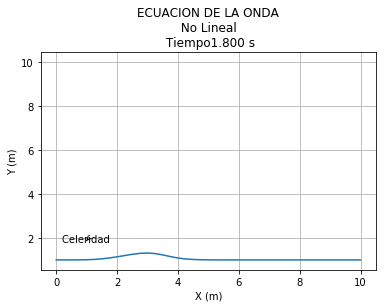

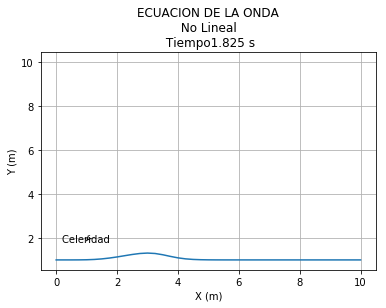

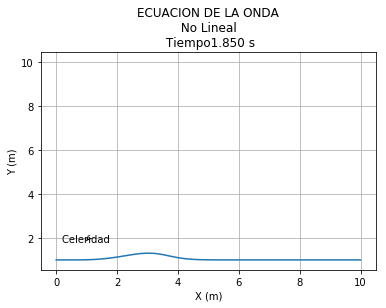

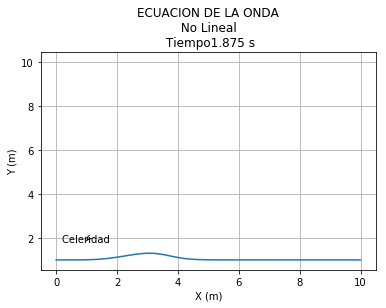

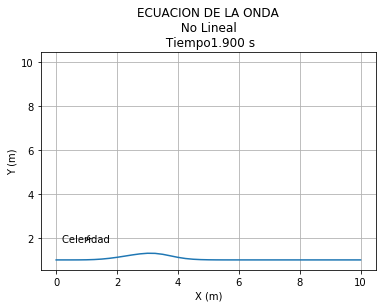

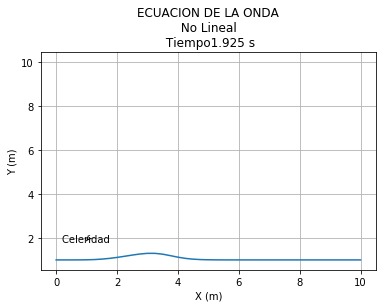

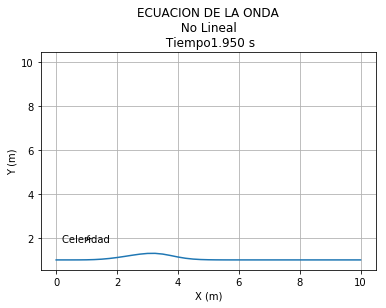

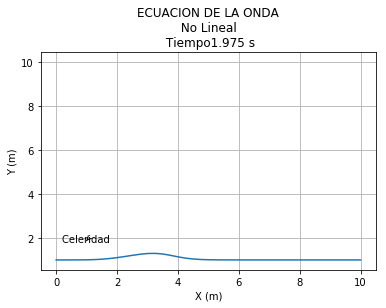

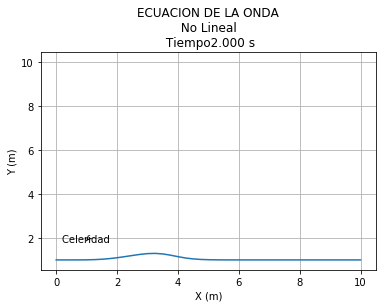

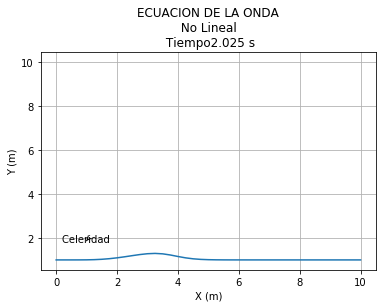

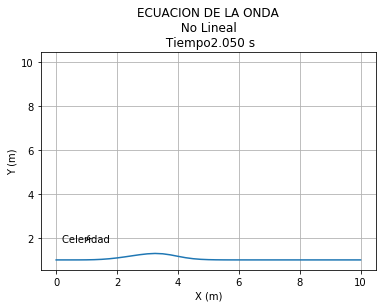

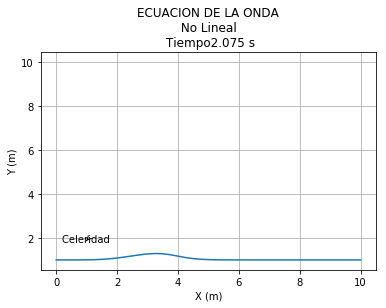

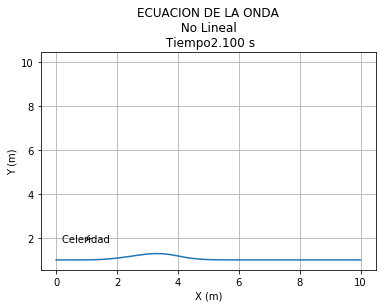

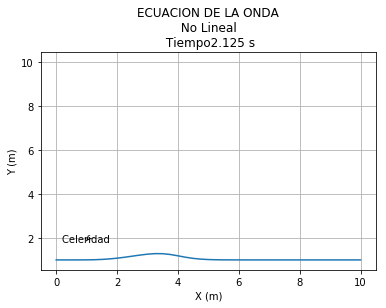

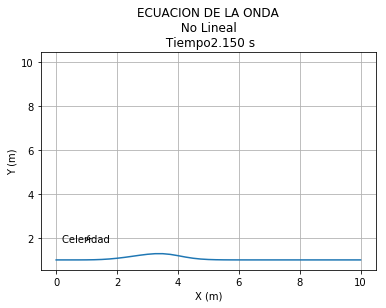

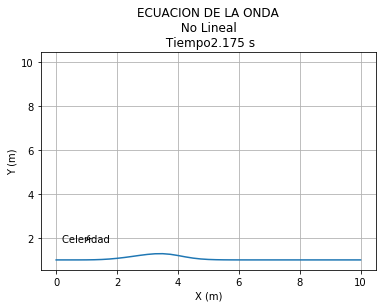

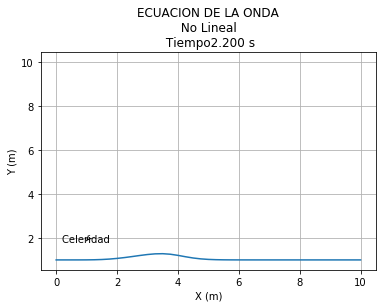

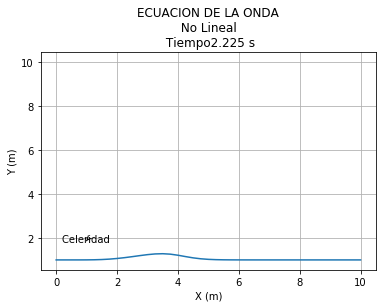

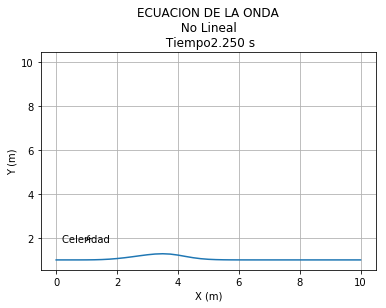

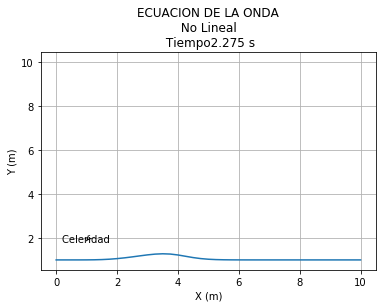

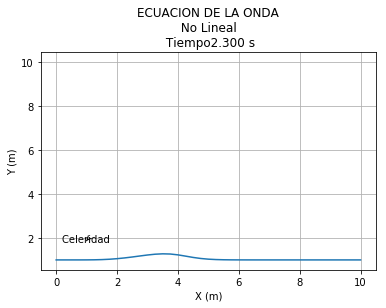

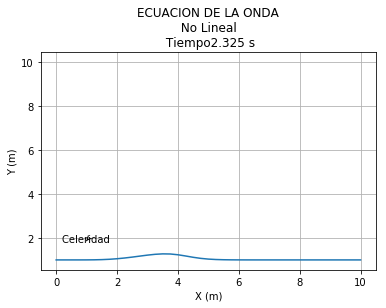

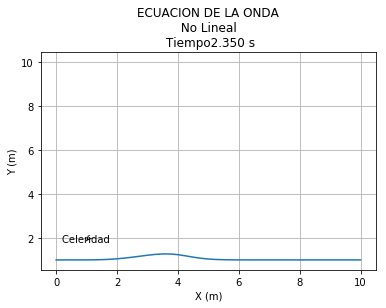

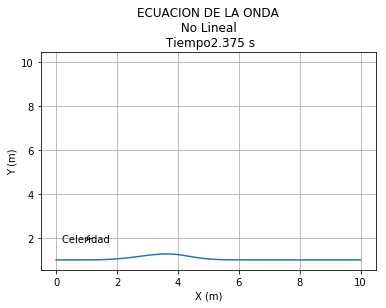

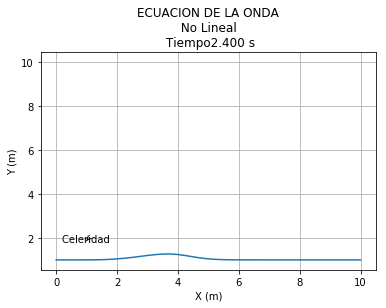

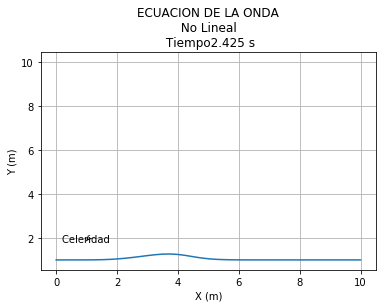

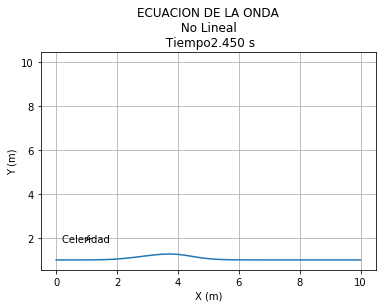

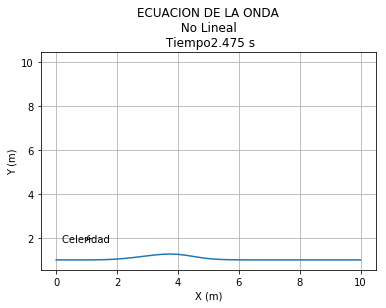

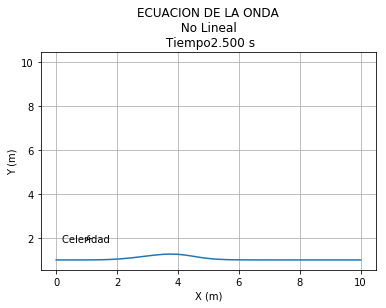

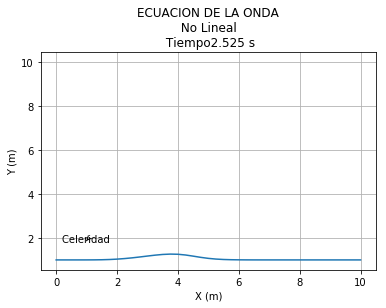

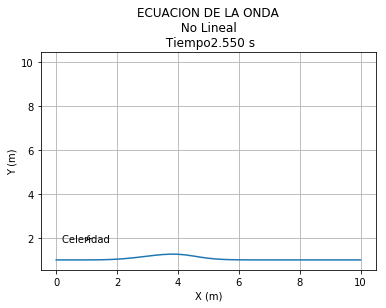

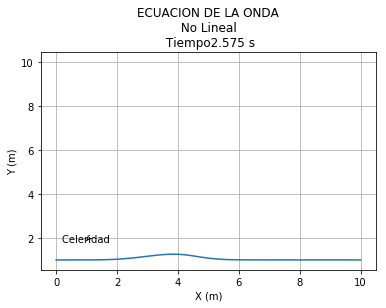

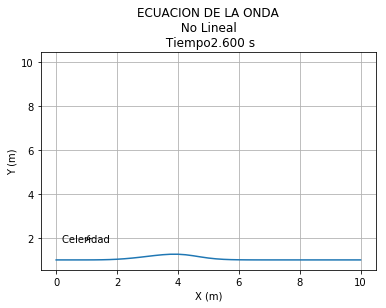

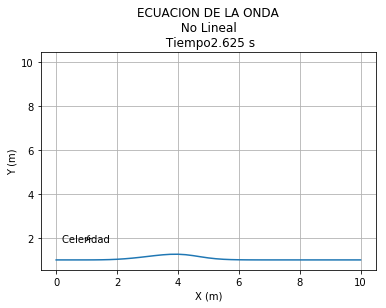

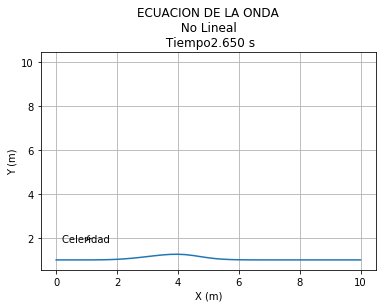

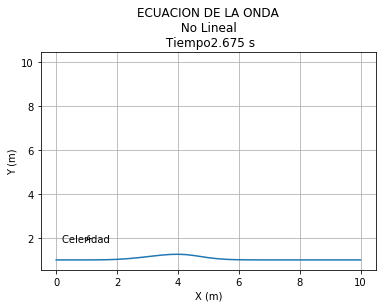

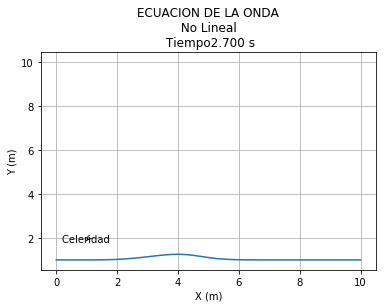

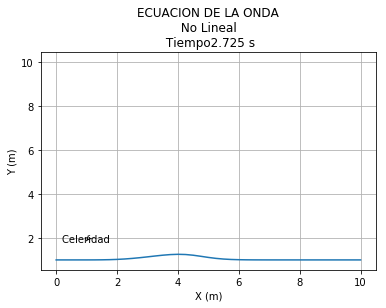

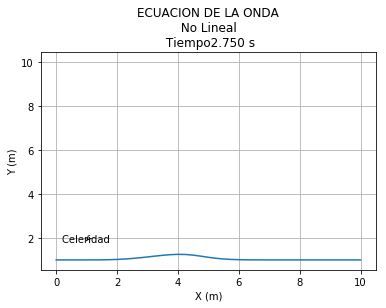

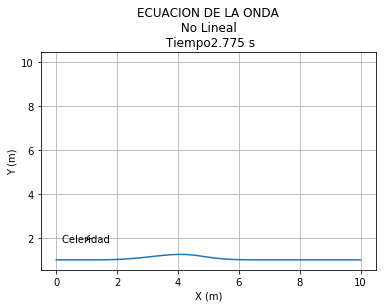

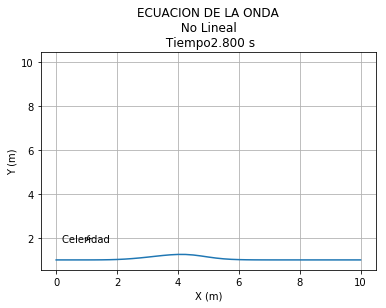

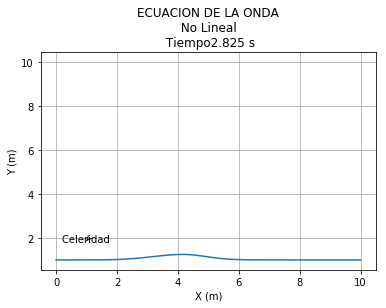

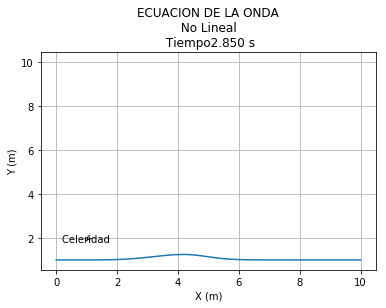

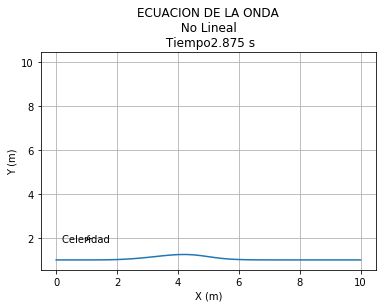

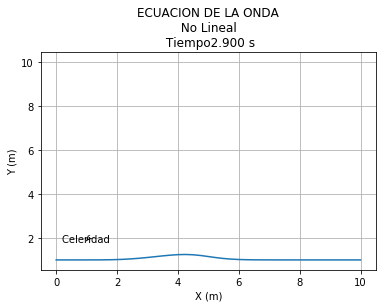

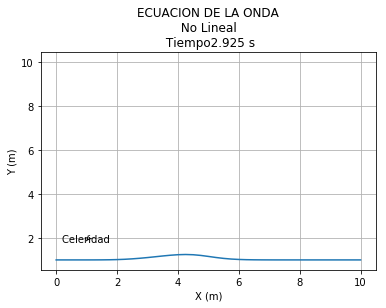

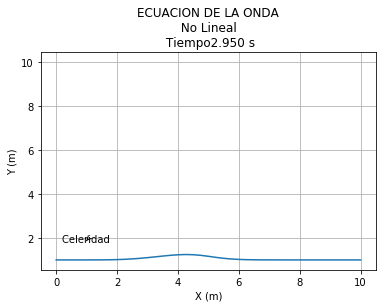

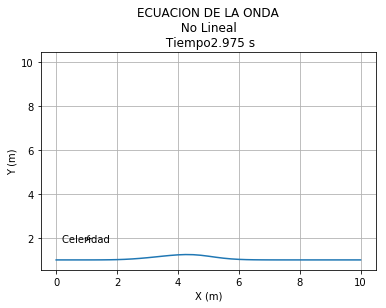

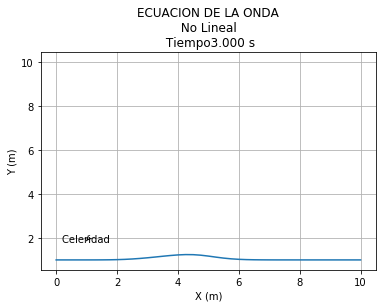

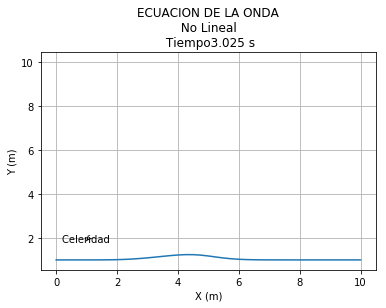

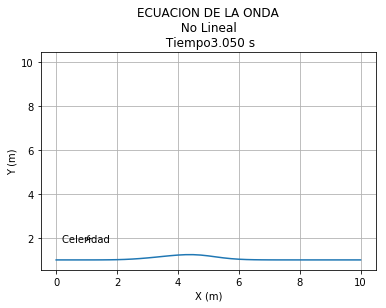

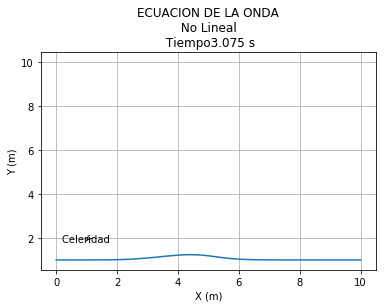

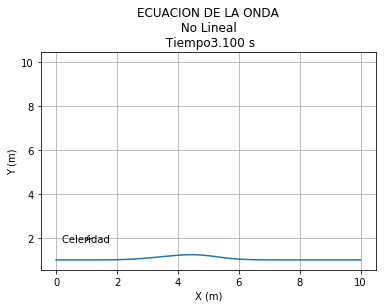

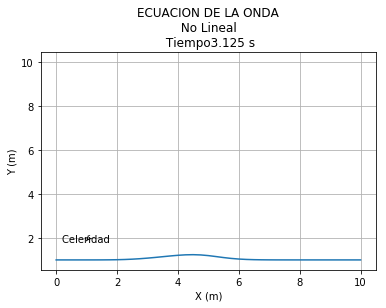

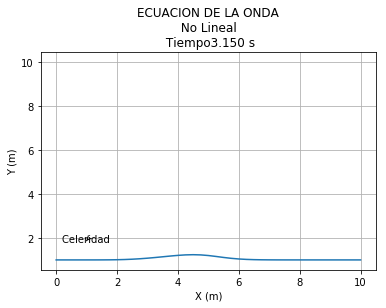

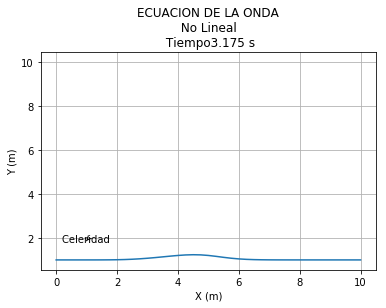

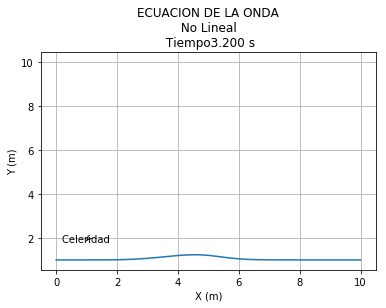

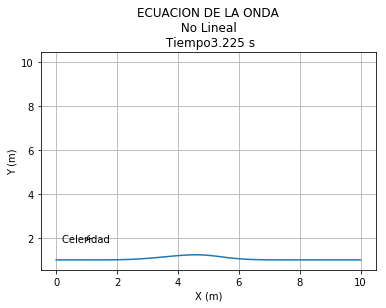

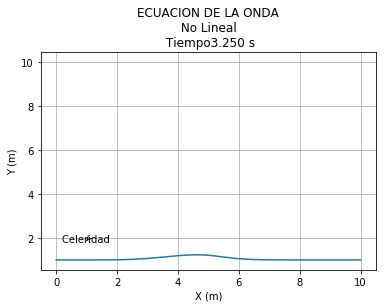

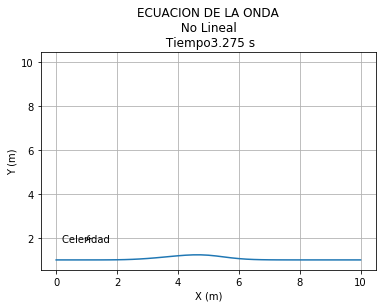

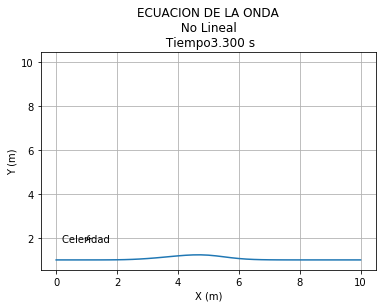

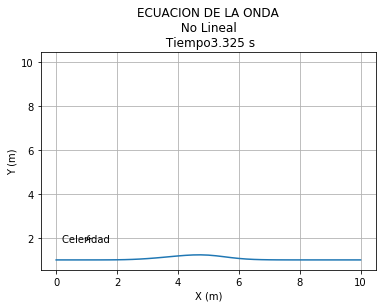

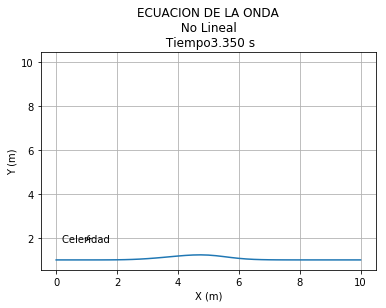

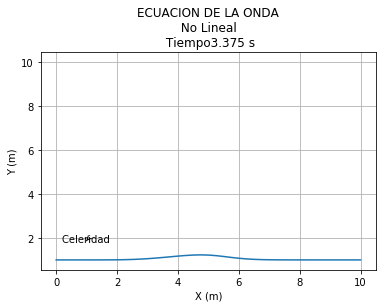

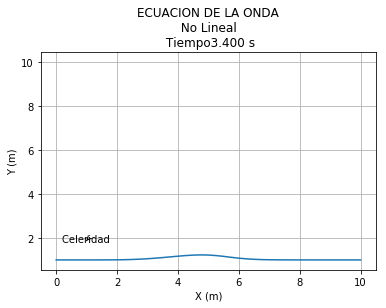

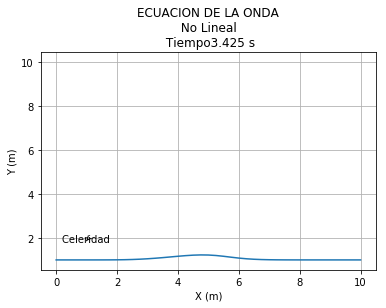

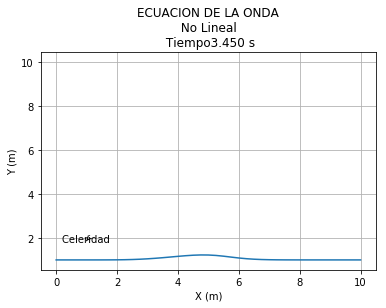

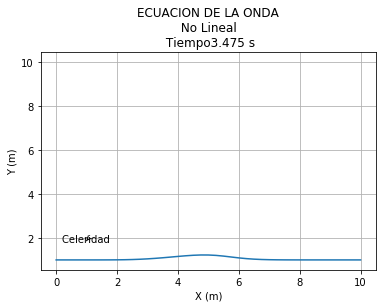

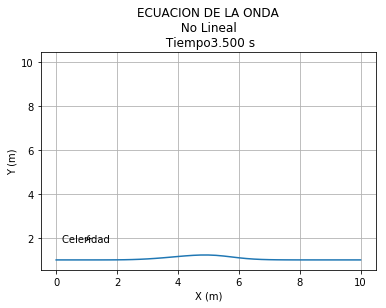

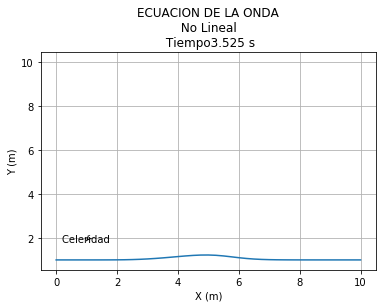

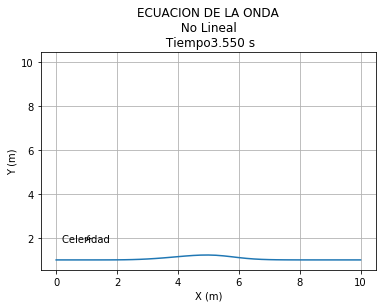

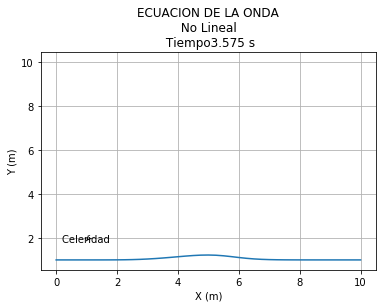

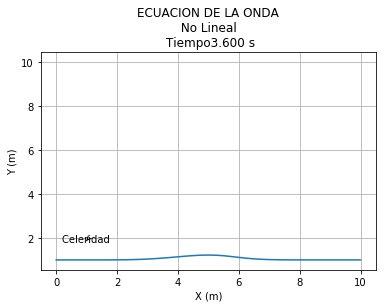

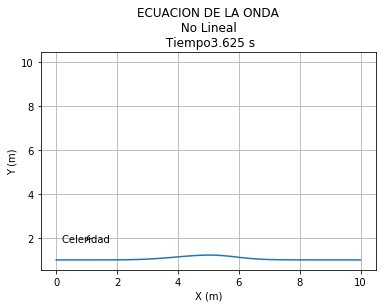

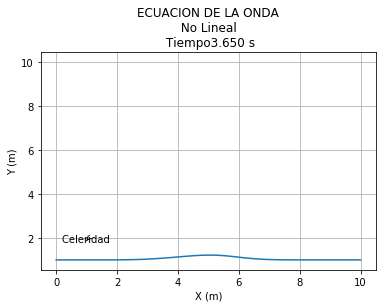

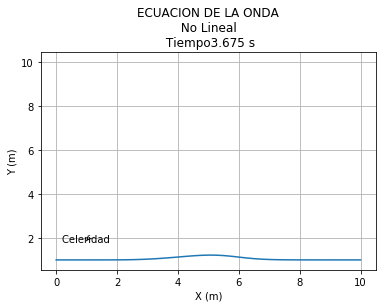

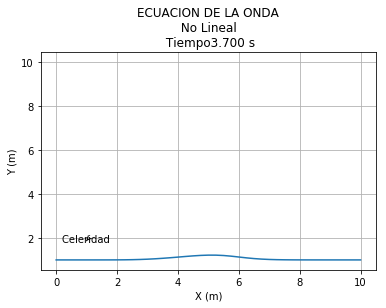

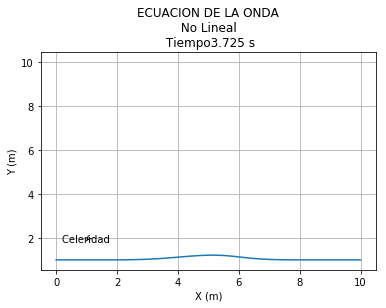

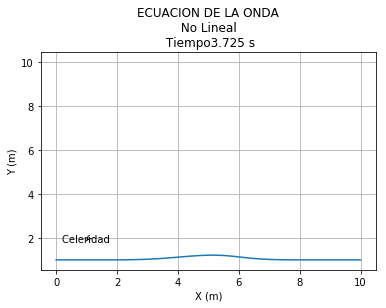

In [6]:
b = Funcion().wave_no_lineal(41,150,0.025,10)

**CONCLUSIONES**

* Se puede ver que en la ecuación de convección no lineal, la onda se difunde más rápido que en la ecuacón lineal.

   **CODIGO**

* [Wave](https://github.com/alexander14rc/PyCFD/blob/master/Onedimension-PyCFD.py)

** AUTOR **

* [alexander14rc](https://github.com/alexander14rc)